In [2]:
import requests
from bs4 import BeautifulSoup
import logging
import re
import nltk
import numpy as np
import pandas as pd

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 1000)

We will be scraping from www.carsales.com.au for all cars sold by dealerships in NSW to investigate which features explain the car sale price. The scrape itself will consider the most popular brands of cars sold in NSW, namely:
- Toyota
- Mazda
- BMW
- Volkswagen
- Ford
- Audi
- Volvo

# Vehicle Class

In [3]:
class Vehicle:
    def __init__(self, url):
        r = requests.get(url)
        if r.status_code != 200:
            logging.error("Status code was " + str(r.status_code))
            raise ValueError
        self.html = r.text
        self.soup = BeautifulSoup(self.html, 'lxml')
        
    def cartitle(self):
        cartitle_element = self.soup.find('h1', class_="col-8 details-title")
        return cartitle_element.text
    
    def carfullname(self):
        carinfo = self.soup.find('div', id="vehicle-details")
        return carinfo.find_all('td')[0].text
        
    def carprice(self):
        carprice_element = self.soup.find('div', class_="price-value")
        return carprice_element.text
    
    def carcolor(self):
        carcolor_element = self.soup.find_all('td')
        return carcolor_element[3].string.strip()
    
    def odometer(self):
        km_element = self.soup.find('span', class_="media-heading")
        return km_element.text
    
    def transmission(self):
        transmission_element = self.soup.find_all('td')
        return transmission_element[4].string.strip()
    
    def carbody(self):
        carbody_element = self.soup.find_all('td')
        return carbody_element[5].string.strip()
    
    def cardrivetype(self):
        cardrivetype_element = self.soup.find_all('td')
        return cardrivetype_element[6].string.strip()
    
    def carengine(self):
        carinfo = self.soup.find_all('td')
        return carinfo[7].string.strip()
    
    def carbuilddate(self):
        carinfo = self.soup.find_all('td')
        return carinfo[11].string.strip()
    
    def carcompliancedate(self):
        carinfo = self.soup.find_all('td')
        return carinfo[12].string.strip()
    
    def sellerdesc(self):
        desc = self.soup.find('div', class_="view-more-target")
        return desc.text

## Car Makes sold by car dealerships in NSW
---
**I think https://www.carsales.com.au caught on to my scraping very quickly. I wasn't able to go through the entire list of cars below.**

In [4]:
volvo = 'https://www.carsales.com.au/car/dealer/bncis/demo/volvo/new-south-wales-state/'
mazda = 'https://www.carsales.com.au/car/dealer/bncis/demo/mazda/new-south-wales-state/'
vw = 'https://www.carsales.com.au/car/dealer/bncis/demo/volkswagen/new-south-wales-state/'
audi = 'https://www.carsales.com.au/car/dealer/bncis/demo/audi/new-south-wales-state/'
toyota = 'https://www.carsales.com.au/car/dealer/bncis/demo/toyota/new-south-wales-state/'
bmw = 'https://www.carsales.com.au/car/dealer/bncis/demo/bmw/new-south-wales-state/'
ford = 'https://www.carsales.com.au/car/dealer/bncis/demo/ford/new-south-wales-state/'
holden = 'https://www.carsales.com.au/car/dealer/bncis/demo/holden/new-south-wales-state/'
subaru = 'https://www.carsales.com.au/car/dealer/bncis/demo/subaru/new-south-wales-state/'
nissan = 'https://www.carsales.com.au/car/dealer/bncis/demo/nissan/new-south-wales-state/'
mitsubishi = 'https://www.carsales.com.au/car/dealer/bncis/demo/mitsubishi/new-south-wales-state/'
kia = 'https://www.carsales.com.au/car/dealer/bncis/demo/kia/new-south-wales-state/'
honda = 'https://www.carsales.com.au/car/dealer/bncis/demo/honda/new-south-wales-state/'

# All Dealer Cars on sale in NSW

In [5]:
def get_vehicle_links_on_page(url):
    offset = 0
    while True:
        r = requests.get(url + "?offset=" + str(offset) + '&setype=pagination')
        if r.status_code != 200:
            raise ValueError
        soup = BeautifulSoup(r.text, 'lxml')
        fail = soup.find(class_='next tippable').find('a')['href']
        if fail is not None:
            print offset, "results parsed"
            links = soup.find_all('a', class_='click-area')
            for link in links:
                yield 'https://www.carsales.com.au'+str(link['href'])
            # Each page of has 12 results
            offset += 12
        else:
            break

In [39]:
def scrape_cars(manufacturer)
    import time
    all_cars = []
    for link in get_vehicle_links_on_page(manufacturer):
        print link
        all_cars.append(Vehicle(link))
        time.sleep(0.1)

scrape_cars(volvo)

0 results parsed
https://www.carsales.com.au/demo/details/Volvo-XC60-2017/OAG-AD-15006469/?gts=OAG-AD-15006469&gtssaleid=OAG-AD-15006469&rankingType=TopSpot
https://www.carsales.com.au/demo/details/Volvo-V40-2017/OAG-AD-15130249/?gts=OAG-AD-15130249&gtssaleid=OAG-AD-15130249&rankingType=Showcase
https://www.carsales.com.au/demo/details/Volvo-XC60-2017/OAG-AD-15014946/?gts=OAG-AD-15014946&gtssaleid=OAG-AD-15014946&rankingType=Showcase
https://www.carsales.com.au/demo/details/Volvo-XC60-2016/OAG-AD-14810659/?gts=OAG-AD-14810659&gtssaleid=OAG-AD-14810659&rankingType=Showcase
https://www.carsales.com.au/dealer/details/Volvo-XC90-2010/OAG-AD-14513122/?Cr=0
https://www.carsales.com.au/dealer/details/Volvo-XC90-2012/OAG-AD-15086415/?Cr=1
https://www.carsales.com.au/demo/details/Volvo-XC60-2017/OAG-AD-15100302/?gts=OAG-AD-15100302&gtssaleid=OAG-AD-15100302&Cr=2&rankingType=
https://www.carsales.com.au/demo/details/Volvo-V60-2016/OAG-AD-13458671/?gts=OAG-AD-13458671&gtssaleid=OAG-AD-13458671&Cr

192 results parsed
https://www.carsales.com.au/dealer/details/Volvo-V40-Cross-Country-2015/OAG-AD-14900086/?gts=OAG-AD-14900086&gtssaleid=OAG-AD-14900086&Cr=198&rankingType=
204 results parsed
216 results parsed
https://www.carsales.com.au/demo/details/Volvo-V40-Cross-Country-2017/OAG-AD-14942813/?gts=OAG-AD-14942813&gtssaleid=OAG-AD-14942813&Cr=216&rankingType=
https://www.carsales.com.au/demo/details/Volvo-V40-2017/OAG-AD-15130196/?gts=OAG-AD-15130196&gtssaleid=OAG-AD-15130196&Cr=219&rankingType=
228 results parsed
https://www.carsales.com.au/demo/details/Volvo-XC60-2017/OAG-AD-15014946/?gts=OAG-AD-15014946&gtssaleid=OAG-AD-15014946&Cr=232&rankingType=
https://www.carsales.com.au/dealer/details/Volvo-S60-2014/OAG-AD-14669780/?gts=OAG-AD-14669780&gtssaleid=OAG-AD-14669780&Cr=236&rankingType=
https://www.carsales.com.au/demo/details/Volvo-V40-2017/OAG-AD-14688447/?gts=OAG-AD-14688447&gtssaleid=OAG-AD-14688447&Cr=237&rankingType=
https://www.carsales.com.au/demo/details/Volvo-XC90-2017/

TypeError: 'NoneType' object has no attribute '__getitem__'

In [40]:
all_cars

[<__main__.Vehicle instance at 0x0000000036A49148>,
 <__main__.Vehicle instance at 0x0000000036A49748>,
 <__main__.Vehicle instance at 0x0000000037079E08>,
 <__main__.Vehicle instance at 0x0000000037079E88>,
 <__main__.Vehicle instance at 0x0000000037C97F88>,
 <__main__.Vehicle instance at 0x0000000037C97D08>,
 <__main__.Vehicle instance at 0x00000000346F0E88>,
 <__main__.Vehicle instance at 0x00000000346F0F08>,
 <__main__.Vehicle instance at 0x000000002A632E08>,
 <__main__.Vehicle instance at 0x000000003301E1C8>,
 <__main__.Vehicle instance at 0x0000000015BC4D48>,
 <__main__.Vehicle instance at 0x0000000033C09C88>,
 <__main__.Vehicle instance at 0x0000000031F81DC8>,
 <__main__.Vehicle instance at 0x000000002FD9AF48>,
 <__main__.Vehicle instance at 0x000000002FD9AFC8>,
 <__main__.Vehicle instance at 0x00000000330A6EC8>,
 <__main__.Vehicle instance at 0x00000000390A0F48>,
 <__main__.Vehicle instance at 0x00000000390A0EC8>,
 <__main__.Vehicle instance at 0x00000000390A3688>,
 <__main__.V

# Functions to return features in car dataframe

In [41]:
def cartitle_or_none(x):
    try:
        return x.cartitle()
    except:
        return ""

def carfullname_or_none(x):
    try:
        return x.carfullname()
    except:
        return ""
    
def carprice_or_none(x):
    try:
        return x.carprice()
    except:
        return ""
    
def carcolor_or_none(x):
    try:
        return x.carcolor()
    except:
        return ""
    
def odometer_or_none(x):
    try:
        return x.odometer()
    except:
        return ""

def transmission_or_none(x):
    try:
        return x.transmission()
    except:
        return ""

def carbody_or_none(x):
    try:
        return x.carbody()
    except:
        return ""   

def cardrivetype_or_none(x):
    try:
        return x.cardrivetype()
    except:
        return ""    

def carengine_or_none(x):
    try:
        return x.carengine()
    except:
        return ""       

def carbuilddate_or_none(x):
    try:
        return x.carbuilddate()
    except:
        return ""    
    
def sellerdesc_or_none(x):
    try:
        return x.sellerdesc()
    except:
        return ""

In [42]:
import pandas as pd
volvo_df = pd.DataFrame({
    'car' : [cartitle_or_none(x) for x in all_cars],
    'full_title' : [carfullname_or_none(x) for x in all_cars],
    'price' : [carprice_or_none(x) for x in all_cars],
    'color': [carcolor_or_none(x) for x in all_cars],
    'odometer': [odometer_or_none(x) for x in all_cars],
    'description': [sellerdesc_or_none(x) for x in all_cars],
    'transmission': [transmission_or_none(x) for x in all_cars],
    'body': [carbody_or_none(x) for x in all_cars],
    'drivetype': [cardrivetype_or_none(x) for x in all_cars],
    'engine': [carengine_or_none(x) for x in all_cars],
    'buildate': [carbuilddate_or_none(x) for x in all_cars]
})
volvo_df

,body,buildate,car,color,description,drivetype,engine,full_title,odometer,price,transmission
0,5 doors 5 seat SUV,July 2017,\r\n2017 Volvo XC60 T5 R-Design Auto AWD ...,White,\nWelcome to the Winner of Volvo Major Metro D...,Four Wheel Drive,4 cylinder Petrol Turbo Intercooled 2.0L,T5 R-Design Wagon 5dr Geartronic 8sp AWD 2.0T ...,"1,188 km","$59,888",8 speed Sports Automatic
1,5 doors 5 seat Hatch,August 2017,\r\n2017 Volvo V40 D2 Momentum Auto ...,Ice White,\nWelcome to the Winner of Volvo Major Metro D...,Front Wheel Drive,4 cylinder Diesel Turbo Intercooled 2.0L,D2 Momentum Hatchback 5dr Adap Geartronic 6sp ...,"1,008 km","$32,888",6 speed Sports Automatic
2,5 doors 5 seat SUV,June 2017,\r\n2017 Volvo XC60 T5 R-Design Auto AWD ...,Electric Silver,\nWelcome to 'Car City'! We are one of the lar...,Four Wheel Drive,4 cylinder Petrol Turbo Intercooled 2.0L,T5 R-Design Wagon 5dr Geartronic 8sp AWD 2.0T ...,"1,109 km","$58,990",8 speed Sports Automatic
3,5 doors 5 seat SUV,October 2016,\r\n2016 Volvo XC60 T6 R-Design Auto AWD ...,Onyx Black,\nWelcome to Car City'! We are one of the larg...,Four Wheel Drive,4 cylinder Petrol Turbo Supercharged Intercool...,T6 R-Design Wagon 5dr Geartronic 8sp AWD 2.0TS...,"1,030 km","$78,830",8 speed Sports Automatic
4,5 doors 7 seat SUV,February 2010,\r\n2010 Volvo XC90 V8 Executive Auto 4x4 ...,Black Sapphire,\nRARE V8 - FULL LEATHER - 5 YEARS WARRANTY &...,4X4 On Demand,8 cylinder Petrol Aspirated 4.4L,V8 Executive Wagon 7st 5dr Geartronic 6sp 4x4 ...,"130,511 km","$20,990*",6 speed Sports Automatic
5,5 doors 7 seat SUV,February 2012,\r\n2012 Volvo XC90 D5 Executive Auto 4x4 ...,Black,\n* 7 SEATER *\nWe are pleased to present this...,4X4 On Demand,5 cylinder Diesel Turbo Intercooled 2.4L,D5 Executive Wagon 7st 5dr Geartronic 6sp 4x4 ...,"57,123 km","$38,880*",6 speed Sports Automatic
6,5 doors 5 seat SUV,June 2017,\r\n2017 Volvo XC60 T5 R-Design Auto AWD ...,Electric Silver,\nWelcome to the Winner of Volvo Major Metro D...,Four Wheel Drive,4 cylinder Petrol Turbo Intercooled 2.0L,T5 R-Design Wagon 5dr Geartronic 8sp AWD 2.0T ...,"1,288 km","$59,888",8 speed Sports Automatic
7,5 doors 5 seat Wagon,June 2016,\r\n2016 Volvo V60 T6 R-Design Auto AWD ...,Bursting Blue,"\nGood performance, Great condition, Best valu...",Four Wheel Drive,4 cylinder Petrol Turbo Supercharged Intercool...,T6 R-Design Wagon 5dr Geartronic 8sp AWD 2.0TS...,"1,120 km","$67,830",8 speed Sports Automatic
8,5 doors 7 seat SUV,May 2012,\r\n2012 Volvo XC90 Executive Auto 4x4 ...,Black,\nIMMACULATE VEHICLE WITH LOG BOOKS AND SERVIC...,4X4 On Demand,6 cylinder Petrol Aspirated 3.2L,Executive Wagon 7st 5dr Geartronic 6sp 4x4 3.2...,"91,833 km","$32,990*",6 speed Sports Automatic
9,5 doors 7 seat SUV,Check with seller,\r\n2011 Volvo XC90 Executive Auto 4x4 ...,Grey,\nThis 2011 Complied 2012 VOLVO XC90 3.2 EXCUT...,4X4 On Demand,6 cylinder Petrol Aspirated 3.2L,Executive Wagon 7st 5dr Geartronic 6sp 4x4 3.2...,"50,322 km","$29,800*",6 speed Sports Automatic


In [52]:
import time
toyotas = []
for link in get_vehicle_links_on_page(toyota):
    print link
    toyotas.append(Vehicle(link))
    time.sleep(0.1)

0 results parsed
https://www.carsales.com.au/dealer/details/Toyota-FJ-Cruiser-2013/OAG-AD-15021733/?gts=OAG-AD-15021733&gtssaleid=OAG-AD-15021733&rankingType=TopSpot
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-2014/OAG-AD-14932755/?gts=OAG-AD-14932755&gtssaleid=OAG-AD-14932755&rankingType=Showcase
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2014/OAG-AD-15070677/?gts=OAG-AD-15070677&gtssaleid=OAG-AD-15070677&rankingType=Showcase
https://www.carsales.com.au/dealer/details/Toyota-Kluger-2014/OAG-AD-15031527/?gts=OAG-AD-15031527&gtssaleid=OAG-AD-15031527&rankingType=Showcase
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-2012/OAG-AD-15031070/?Cr=0
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2012/OAG-AD-14767046/?Cr=1
https://www.carsales.com.au/dealer/details/Toyota-Prius-V-2016/OAG-AD-14870187/?Cr=2
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2016/OAG-AD-15110480/?Cr=3
https://www.carsales.com.au/dealer/details

https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2014/OAG-AD-15026785/?Cr=83
84 results parsed
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2014/OAG-AD-15107173/?Cr=84
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2014/OAG-AD-14972262/?Cr=85
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2009/OAG-AD-14960991/?Cr=86
https://www.carsales.com.au/dealer/details/Toyota-Camry-2015/OAG-AD-14555471/?Cr=87
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2009/OAG-AD-14759330/?Cr=88
https://www.carsales.com.au/dealer/details/Toyota-Tarago-2008/OAG-AD-14421156/?Cr=89
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2010/OAG-AD-15031595/?gts=OAG-AD-15031595&gtssaleid=OAG-AD-15031595&Cr=90&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2011/OAG-AD-15136486/?Cr=91
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2010/OAG-AD-14999301/?Cr=92
https://www.carsales.com.au/deale

https://www.carsales.com.au/dealer/details/Toyota-Kluger-2014/OAG-AD-14396163/?gts=OAG-AD-14396163&gtssaleid=OAG-AD-14396163&Cr=173&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-Tarago-2012/OAG-AD-14957257/?Cr=174
https://www.carsales.com.au/dealer/details/Toyota-Tarago-2011/OAG-AD-15097184/?Cr=175
https://www.carsales.com.au/dealer/details/Toyota-Aurion-2015/OAG-AD-14899827/?Cr=176
https://www.carsales.com.au/dealer/details/Toyota-Camry-2016/OAG-AD-15067506/?Cr=177
https://www.carsales.com.au/dealer/details/Toyota-Camry-2014/OAG-AD-15061058/?Cr=178
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2015/OAG-AD-15043265/?Cr=179
180 results parsed
https://www.carsales.com.au/dealer/details/Toyota-Alphard-2005/OAG-AD-14799979/?Cr=180
https://www.carsales.com.au/dealer/details/Toyota-Yaris-2012/OAG-AD-14918908/?Cr=181
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2009/OAG-AD-14861627/?Cr=182
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2008

https://www.carsales.com.au/dealer/details/Toyota-Hiace-2008/OAG-AD-14678948/?Cr=260
https://www.carsales.com.au/dealer/details/Toyota-Kluger-2010/OAG-AD-14925449/?gts=OAG-AD-14925449&gtssaleid=OAG-AD-14925449&Cr=261&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2013/OAG-AD-14940368/?Cr=262
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2006/OAG-AD-14639876/?Cr=263
264 results parsed
https://www.carsales.com.au/dealer/details/Toyota-Yaris-2014/OAG-AD-15067194/?Cr=264
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2012/OAG-AD-14681584/?Cr=265
https://www.carsales.com.au/dealer/details/Toyota-Aurion-2010/OAG-AD-15128020/?Cr=266
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2008/OAG-AD-15048295/?Cr=267
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2005/OAG-AD-15095402/?Cr=268
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2003/OAG-AD-15057641/?Cr=269
https://www.carsales.com.au/dealer/details/Toyota-Landcr

https://www.carsales.com.au/dealer/details/Toyota-Spacia-2000/OAG-AD-14799989/?Cr=349
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-2012/OAG-AD-14803786/?Cr=350
https://www.carsales.com.au/dealer/details/Toyota-Kluger-2015/OAG-AD-14767907/?Cr=351
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2013/OAG-AD-14721774/?Cr=352
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2015/OAG-AD-14861934/?Cr=353
https://www.carsales.com.au/dealer/details/Toyota-Kluger-2014/OAG-AD-15120515/?Cr=354
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-2007/OAG-AD-14529081/?Cr=355
https://www.carsales.com.au/dealer/details/Toyota-Hiace-2013/OAG-AD-15077947/?Cr=356
https://www.carsales.com.au/dealer/details/Toyota-Camry-2016/OAG-AD-15132977/?Cr=357
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2012/OAG-AD-14985155/?Cr=358
https://www.carsales.com.au/dealer/details/Toyota-Kluger-2015/OAG-AD-15124652/?Cr=359
360 results parsed
https://www.carsal

https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2014/OAG-AD-14641659/?Cr=439
https://www.carsales.com.au/dealer/details/Toyota-Kluger-2015/OAG-AD-14996720/?Cr=440
https://www.carsales.com.au/dealer/details/Toyota-Hiace-2014/OAG-AD-14954458/?Cr=441
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2016/OAG-AD-15050994/?Cr=442
https://www.carsales.com.au/dealer/details/Toyota-86-2013/OAG-AD-15041659/?Cr=443
444 results parsed
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2016/OAG-AD-15136431/?Cr=444
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2012/OAG-AD-14876629/?Cr=445
https://www.carsales.com.au/dealer/details/Toyota-Camry-2015/OAG-AD-14914086/?Cr=446
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2014/OAG-AD-15109184/?Cr=447
https://www.carsales.com.au/dealer/details/Toyota-Estima-2008/OAG-AD-14994453/?Cr=448
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2013/OAG-AD-14979465/?Cr=449
https://www.carsales.com.au/deale

528 results parsed
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2016/OAG-AD-15024453/?Cr=528
https://www.carsales.com.au/dealer/details/Toyota-Yaris-2015/OAG-AD-14893849/?Cr=529
https://www.carsales.com.au/dealer/details/Toyota-Estima-2005/OAG-AD-15125165/?gts=OAG-AD-15125165&gtssaleid=OAG-AD-15125165&Cr=530&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-Yaris-2014/OAG-AD-15079407/?Cr=531
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2015/OAG-AD-14583156/?Cr=532
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2014/OAG-AD-15122244/?gts=OAG-AD-15122244&gtssaleid=OAG-AD-15122244&Cr=533&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2015/OAG-AD-14924514/?Cr=534
https://www.carsales.com.au/dealer/details/Toyota-Camry-2015/OAG-AD-15114894/?Cr=535
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2011/OAG-AD-15013132/?Cr=536
https://www.carsales.com.au/dealer/details/Toyota-Estima-2005/OAG-AD-129

https://www.carsales.com.au/dealer/details/Toyota-Corolla-2012/OAG-AD-14924171/?Cr=614
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-2012/OAG-AD-15078527/?Cr=615
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-2013/OAG-AD-14980029/?gts=OAG-AD-14980029&gtssaleid=OAG-AD-14980029&Cr=616&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-Kluger-2014/OAG-AD-15050513/?Cr=617
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2017/OAG-AD-15083677/?Cr=618
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2010/OAG-AD-15119444/?Cr=619
https://www.carsales.com.au/dealer/details/Toyota-Kluger-2011/OAG-AD-14999057/?Cr=620
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2013/OAG-AD-14488589/?Cr=621
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2016/OAG-AD-15002720/?Cr=622
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2014/OAG-AD-15113558/?Cr=623
624 results parsed
https://www.carsales.com.au/dealer/details/

https://www.carsales.com.au/dealer/details/Toyota-RAV4-2016/OAG-AD-14758175/?Cr=704
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2015/OAG-AD-14982317/?Cr=705
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2009/OAG-AD-14981748/?Cr=706
https://www.carsales.com.au/dealer/details/Toyota-Aurion-2015/OAG-AD-14949332/?Cr=707
708 results parsed
https://www.carsales.com.au/dealer/details/Toyota-Aurion-2013/OAG-AD-14974509/?Cr=708
https://www.carsales.com.au/dealer/details/Toyota-Tarago-2008/OAG-AD-14885112/?Cr=709
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2013/OAG-AD-15008306/?Cr=710
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2013/OAG-AD-15119443/?Cr=711
https://www.carsales.com.au/dealer/details/Toyota-Estima-2007/OAG-AD-15041238/?Cr=712
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2014/OAG-AD-14963362/?Cr=713
https://www.carsales.com.au/dealer/details/Toyota-Estima-2005/OAG-AD-14979993/?Cr=714
https://www.carsales.com.au

https://www.carsales.com.au/dealer/details/Toyota-Camry-2016/OAG-AD-15136412/?Cr=795
https://www.carsales.com.au/dealer/details/Toyota-86-2012/OAG-AD-14917222/?Cr=796
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2013/OAG-AD-14654794/?Cr=797
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2013/OAG-AD-14534798/?Cr=798
https://www.carsales.com.au/dealer/details/Toyota-Camry-2016/OAG-AD-15041019/?gts=OAG-AD-15041019&gtssaleid=OAG-AD-15041019&Cr=799&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-Camry-2013/OAG-AD-15105145/?Cr=800
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2012/OAG-AD-15115202/?Cr=801
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2014/OAG-AD-15114300/?Cr=802
https://www.carsales.com.au/dealer/details/Toyota-Aurion-2012/OAG-AD-15118724/?Cr=803
804 results parsed
https://www.carsales.com.au/dealer/details/Toyota-Yaris-2012/OAG-AD-14985485/?Cr=804
https://www.carsales.com.au/dealer/details/Toyota-Estima-2003/OAG-AD-14

https://www.carsales.com.au/dealer/details/Toyota-FJ-Cruiser-2013/OAG-AD-15021733/?gts=OAG-AD-15021733&gtssaleid=OAG-AD-15021733&Cr=885&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2014/OAG-AD-14434473/?Cr=886
https://www.carsales.com.au/dealer/details/Toyota-Tarago-2012/OAG-AD-14760432/?Cr=887
888 results parsed
https://www.carsales.com.au/dealer/details/Toyota-86-2012/OAG-AD-15065934/?Cr=888
https://www.carsales.com.au/dealer/details/Toyota-Camry-2016/OAG-AD-15116384/?Cr=889
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2012/OAG-AD-14732755/?gts=OAG-AD-14732755&gtssaleid=OAG-AD-14732755&Cr=890&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2015/OAG-AD-15105202/?gts=OAG-AD-15105202&gtssaleid=OAG-AD-15105202&Cr=891&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-Camry-2016/OAG-AD-15068621/?Cr=892
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2014/OAG-AD-15096748/?Cr=893
https://www.carsales.com.au/deal

https://www.carsales.com.au/dealer/details/Toyota-Yaris-2013/OAG-AD-14692459/?Cr=976
https://www.carsales.com.au/dealer/details/Toyota-Yaris-2014/OAG-AD-14026633/?Cr=977
https://www.carsales.com.au/dealer/details/Toyota-Yaris-2014/OAG-AD-14948678/?Cr=978
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2015/OAG-AD-15080243/?Cr=979
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-Prado-2015/OAG-AD-14946373/?gts=OAG-AD-14946373&gtssaleid=OAG-AD-14946373&Cr=980&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-Camry-2016/OAG-AD-15067517/?Cr=981
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2007/OAG-AD-15091162/?Cr=982
https://www.carsales.com.au/dealer/details/Toyota-86-2013/OAG-AD-15022232/?Cr=983
984 results parsed
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2009/OAG-AD-15118740/?Cr=984
https://www.carsales.com.au/dealer/details/Toyota-Spacia-2001/OAG-AD-14799970/?Cr=985
https://www.carsales.com.au/dealer/details/Toyota-

https://www.carsales.com.au/dealer/details/Toyota-Hiace-2014/OAG-AD-15092639/?gts=OAG-AD-15092639&gtssaleid=OAG-AD-15092639&Cr=1062&rankingType=
https://www.carsales.com.au/dealer/details/Toyota-Hiace-2011/OAG-AD-15118510/?Cr=1063
https://www.carsales.com.au/dealer/details/Toyota-Hilux-2014/OAG-AD-14609310/?Cr=1064
https://www.carsales.com.au/dealer/details/Toyota-86-2016/OAG-AD-15103237/?Cr=1065
https://www.carsales.com.au/dealer/details/Toyota-Camry-2016/OAG-AD-15096781/?Cr=1066
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2015/OAG-AD-14989234/?Cr=1067
1068 results parsed
https://www.carsales.com.au/dealer/details/Toyota-Camry-2015/OAG-AD-15141856/?Cr=1068
https://www.carsales.com.au/dealer/details/Toyota-RAV4-2004/OAG-AD-14519634/?Cr=1069
https://www.carsales.com.au/dealer/details/Toyota-Kluger-2016/OAG-AD-15054504/?Cr=1070
https://www.carsales.com.au/dealer/details/Toyota-Landcruiser-2007/OAG-AD-15090582/?gts=OAG-AD-15090582&gtssaleid=OAG-AD-15090582&Cr=1071&rankingTyp

https://www.carsales.com.au/dealer/details/Toyota-RAV4-2016/OAG-AD-15114299/?Cr=1150
1152 results parsed
1164 results parsed
1176 results parsed
1188 results parsed
1200 results parsed
https://www.carsales.com.au/dealer/details/Toyota-Corolla-2013/OAG-AD-14935228/?gts=OAG-AD-14935228&gtssaleid=OAG-AD-14935228&Cr=1206&rankingType=
1212 results parsed
1224 results parsed
1236 results parsed
1248 results parsed


KeyboardInterrupt: 

In [53]:
toyotas

[<__main__.Vehicle instance at 0x000000022B499588>,
 <__main__.Vehicle instance at 0x000000022B499B48>,
 <__main__.Vehicle instance at 0x0000000229967EC8>,
 <__main__.Vehicle instance at 0x0000000229967C88>,
 <__main__.Vehicle instance at 0x000000022563C148>,
 <__main__.Vehicle instance at 0x0000000220083208>,
 <__main__.Vehicle instance at 0x000000021B7B9208>,
 <__main__.Vehicle instance at 0x0000000204865348>,
 <__main__.Vehicle instance at 0x00000001F759EE08>,
 <__main__.Vehicle instance at 0x00000001F759EF88>,
 <__main__.Vehicle instance at 0x000000020027C1C8>,
 <__main__.Vehicle instance at 0x00000002106C0D08>,
 <__main__.Vehicle instance at 0x0000000215194B88>,
 <__main__.Vehicle instance at 0x0000000215194D08>,
 <__main__.Vehicle instance at 0x00000002034D7108>,
 <__main__.Vehicle instance at 0x00000001C4BA3D88>,
 <__main__.Vehicle instance at 0x00000001EFDFFFC8>,
 <__main__.Vehicle instance at 0x00000001EFDFFF48>,
 <__main__.Vehicle instance at 0x00000001F4A97F88>,
 <__main__.V

In [54]:
import pandas as pd
toyota_df = pd.DataFrame({
    'car' : [cartitle_or_none(x) for x in toyotas],
    'full_title' : [carfullname_or_none(x) for x in toyotas],
    'price' : [carprice_or_none(x) for x in toyotas],
    'color': [carcolor_or_none(x) for x in toyotas],
    'odometer': [odometer_or_none(x) for x in toyotas],
    'description': [sellerdesc_or_none(x) for x in toyotas],
    'transmission': [transmission_or_none(x) for x in toyotas],
    'body': [carbody_or_none(x) for x in toyotas],
    'drivetype': [cardrivetype_or_none(x) for x in toyotas],
    'engine': [carengine_or_none(x) for x in toyotas],
    'buildate': [carbuilddate_or_none(x) for x in toyotas]
})
toyota_df

,body,buildate,car,color,description,drivetype,engine,full_title,odometer,price,transmission
0,5 doors 5 seat SUV,February 2013,\r\n2013 Toyota FJ Cruiser Auto 4x4,Orange Clay,"\nRare FJ Cruiser, Only 62,164 kilometres, Fou...",4X4 Dual Range,6 cylinder Petrol Aspirated 4.0L,GSJ15R Wagon 5dr Auto 5sp 4x4 4.0i [Rel. Jan]\...,"62,170 km","$38,990*",5 speed Automatic
1,5 doors 5 seat SUV,January 2014,\r\n2014 Toyota Landcruiser GXL Manual 4x4,French Vanilla,\nFACTORY DIFF LOCKS * 1 PRIVATE OWNER * LOG B...,4X4 Dual Range,8 cylinder Diesel Turbo Intercooled 4.5L,VDJ76R GXL Wagon 5dr Man 5sp 4x4 4.5DT (Sep) [...,"84,230 km","$61,990*",5 speed Manual
2,5 doors 5 seat SUV,September 2014,\r\n2014 Toyota RAV4 Cruiser Auto AWD ...,Wildfire,"\nMAIN EVENT SALE ON NOW """"""2014 Toyota Rav-4 ...",4X4 On Demand,4 cylinder Diesel Turbo Intercooled 2.2L,ALA49R Cruiser Wagon 5dr Spts Auto 6sp AWD 2.2...,"61,276 km","$29,990",6 speed Sports Automatic
3,5 doors 7 seat SUV,January 2014,\r\n2014 Toyota Kluger GXL Auto 2WD,Predawn Grey,\n**** MASSIVE SALE ALL STOCK MUST GO BY 3...,Front Wheel Drive,6 cylinder Petrol Aspirated 3.5L,GSU50R GXL Wagon 7st 5dr Spts Auto 6sp 2WD 3.5...,"114,412 km","$35,990*",6 speed Sports Automatic
4,5 doors 7 seat SUV,August 2012,\r\n2012 Toyota Landcruiser Sahara Auto 4x4 ...,Crystal Pearl,\n2012 Toyota Landcruiser Sahara 4.5L Turbo Di...,4X4 Constant,8 cylinder Diesel Twin Turbo Intercooled 4.5L,VDJ200R Sahara Wagon 7st 5dr Spts Auto 6sp 4x4...,"86,974 km","$73,990*",6 speed Sports Automatic
5,5 doors 7 seat SUV,May 2012,\r\n2012 Toyota Landcruiser Prado Altitude Aut...,Crystal Pearl,\nSimply The Best !!!!!! Toyota Prado Altitude...,4X4 Constant,4 cylinder Diesel Turbo Intercooled 3.0L,KDJ150R Altitude Wagon 7st 5dr Spts Auto 5sp 4...,"92,227 km","$44,990*",5 speed Sports Automatic
6,5 doors 7 seat Wagon,Check with seller,\r\n2016 Toyota Prius V i-Tech Auto,Silver Pearl,\n2016 Toyota Prius V I-Tech! This brilliant v...,Front Wheel Drive,4 cylinder Petrol Aspirated 1.8L,ZVW40R i-Tech Wagon 7st 5dr CVT 1sp 1.8i/60kW ...,"17,263 km","$38,213*",1 speed Constantly Variable Transmission
7,5 doors 5 seat SUV,October 2016,\r\n2016 Toyota RAV4 GXL Auto AWD,Hazel,\n2.2-litre four-cylinder diesel engine (110kW...,4X4 On Demand,4 cylinder Diesel Turbo Intercooled 2.2L,ALA49R GXL Wagon 5dr Spts Auto 6sp AWD 2.2DT\r...,"6,339 km","$36,990*",6 speed Sports Automatic
8,5 doors 8 seat SUV,October 2004,\r\n2004 Toyota Landcruiser GXL Auto 4x4,Glacier White,\nIf you are interested in this vehicle and wa...,4X4 Constant,6 cylinder Diesel Turbo Intercooled 4.2L,HDJ100R GXL Wagon 8st 5dr Auto 5sp 4x4 4.2DT\r...,"305,122 km","$31,998",5 speed Automatic
9,5 doors 7 seat SUV,Check with seller,\r\n2012 Toyota Kluger Grande Auto AWD ...,Ebony,"\n**All Wheel Drive Grande**LEATHER, SATNAV, S...",Four Wheel Drive,6 cylinder Petrol Aspirated 3.5L,GSU45R Grande Wagon 7st 5dr Spts Auto 5sp AWD ...,"102,189 km","$29,990*",5 speed Sports Automatic


In [58]:
import time
all_cars = []
for link in get_vehicle_links_on_page(bmw):
    print link
    all_cars.append(Vehicle(link))
    time.sleep(0.1)

0 results parsed
https://www.carsales.com.au/demo/details/BMW-220i-2016/OAG-AD-15058637/?gts=OAG-AD-15058637&gtssaleid=OAG-AD-15058637&rankingType=TopSpot
https://www.carsales.com.au/demo/details/BMW-X5-2016/OAG-AD-14650525/?gts=OAG-AD-14650525&gtssaleid=OAG-AD-14650525&rankingType=Showcase
https://www.carsales.com.au/demo/details/BMW-320i-2016/OAG-AD-14812213/?gts=OAG-AD-14812213&gtssaleid=OAG-AD-14812213&rankingType=Showcase
https://www.carsales.com.au/dealer/details/BMW-520i-2016/OAG-AD-14948997/?gts=OAG-AD-14948997&gtssaleid=OAG-AD-14948997&rankingType=Showcase
https://www.carsales.com.au/demo/details/BMW-X5-2016/OAG-AD-15108917/?Cr=0
https://www.carsales.com.au/dealer/details/BMW-640d-2013/OAG-AD-15133472/?gts=OAG-AD-15133472&gtssaleid=OAG-AD-15133472&Cr=1&rankingType=
https://www.carsales.com.au/demo/details/BMW-X1-2016/OAG-AD-14983213/?Cr=2
https://www.carsales.com.au/demo/details/BMW-220i-2016/OAG-AD-14781513/?gts=OAG-AD-14781513&gtssaleid=OAG-AD-14781513&Cr=3&rankingType=
http

84 results parsed
https://www.carsales.com.au/demo/details/BMW-320i-2016/OAG-AD-14785257/?gts=OAG-AD-14785257&gtssaleid=OAG-AD-14785257&Cr=84&rankingType=
https://www.carsales.com.au/dealer/details/BMW-X4-2014/OAG-AD-14961880/?Cr=85
https://www.carsales.com.au/dealer/details/BMW-228i-2015/OAG-AD-14391770/?Cr=86
https://www.carsales.com.au/dealer/details/BMW-650i-2009/OAG-AD-15135537/?Cr=87
https://www.carsales.com.au/dealer/details/BMW-X3-2011/OAG-AD-15011585/?Cr=88
https://www.carsales.com.au/dealer/details/BMW-535i-2010/OAG-AD-15041293/?Cr=89
https://www.carsales.com.au/dealer/details/BMW-320d-2012/OAG-AD-15021976/?gts=OAG-AD-15021976&gtssaleid=OAG-AD-15021976&Cr=90&rankingType=
https://www.carsales.com.au/dealer/details/BMW-X3-2009/OAG-AD-15067987/?Cr=91
https://www.carsales.com.au/demo/details/BMW-420d-2016/OAG-AD-14705427/?Cr=92
https://www.carsales.com.au/demo/details/BMW-X3-2017/OAG-AD-15103333/?Cr=93
https://www.carsales.com.au/dealer/details/BMW-228i-2015/OAG-AD-14988461/?gts=

https://www.carsales.com.au/dealer/details/BMW-328i-2014/OAG-AD-15129257/?Cr=173
https://www.carsales.com.au/dealer/details/BMW-320d-2012/OAG-AD-14972227/?Cr=174
https://www.carsales.com.au/dealer/details/BMW-328i-2012/OAG-AD-14985868/?Cr=175
https://www.carsales.com.au/dealer/details/BMW-325Ci-2005/OAG-AD-14278965/?Cr=176
https://www.carsales.com.au/demo/details/BMW-X3-2016/OAG-AD-15122072/?gts=OAG-AD-15122072&gtssaleid=OAG-AD-15122072&Cr=177&rankingType=
https://www.carsales.com.au/dealer/details/BMW-320d-2017/OAG-AD-14894882/?Cr=178
https://www.carsales.com.au/dealer/details/BMW-550i-2010/OAG-AD-13356281/?Cr=179
180 results parsed
https://www.carsales.com.au/demo/details/BMW-120i-2016/OAG-AD-14924637/?gts=OAG-AD-14924637&gtssaleid=OAG-AD-14924637&Cr=180&rankingType=
https://www.carsales.com.au/dealer/details/BMW-X1-2013/OAG-AD-15045403/?Cr=181
https://www.carsales.com.au/dealer/details/BMW-330Ci-2003/OAG-AD-15068463/?Cr=182
https://www.carsales.com.au/dealer/details/BMW-325i-2006/OA

https://www.carsales.com.au/dealer/details/BMW-328i-2014/OAG-AD-15056123/?Cr=262
https://www.carsales.com.au/dealer/details/BMW-X1-2011/OAG-AD-14937505/?Cr=263
264 results parsed
https://www.carsales.com.au/dealer/details/BMW-X6-2017/OAG-AD-14836263/?Cr=264
https://www.carsales.com.au/dealer/details/BMW-430i-2016/OAG-AD-14635723/?Cr=265
https://www.carsales.com.au/demo/details/BMW-420i-2016/OAG-AD-13669362/?gts=OAG-AD-13669362&gtssaleid=OAG-AD-13669362&Cr=266&rankingType=
https://www.carsales.com.au/demo/details/BMW-220i-2017/OAG-AD-14800470/?Cr=267
https://www.carsales.com.au/dealer/details/BMW-X6-2013/OAG-AD-14976134/?Cr=268
https://www.carsales.com.au/demo/details/BMW-428i-2016/OAG-AD-14821772/?gts=OAG-AD-14821772&gtssaleid=OAG-AD-14821772&Cr=269&rankingType=
https://www.carsales.com.au/demo/details/BMW-320d-2015/OAG-AD-14093737/?Cr=270
https://www.carsales.com.au/dealer/details/BMW-M235i-2014/OAG-AD-15090555/?gts=OAG-AD-15090555&gtssaleid=OAG-AD-15090555&Cr=271&rankingType=
https:/

https://www.carsales.com.au/dealer/details/BMW-X5-2015/OAG-AD-14933205/?Cr=349
https://www.carsales.com.au/dealer/details/BMW-X3-2016/OAG-AD-15097913/?Cr=350
https://www.carsales.com.au/demo/details/BMW-X3-2016/OAG-AD-15072009/?Cr=351
https://www.carsales.com.au/dealer/details/BMW-X5-2013/OAG-AD-14784146/?Cr=352
https://www.carsales.com.au/dealer/details/BMW-528i-2015/OAG-AD-15072004/?Cr=353
https://www.carsales.com.au/dealer/details/BMW-X3-2015/OAG-AD-14930481/?Cr=354
https://www.carsales.com.au/dealer/details/BMW-535d-2010/OAG-AD-14224518/?gts=OAG-AD-14224518&gtssaleid=OAG-AD-14224518&Cr=355&rankingType=
https://www.carsales.com.au/dealer/details/BMW-335i-2006/OAG-AD-14818996/?Cr=356
https://www.carsales.com.au/dealer/details/BMW-118i-2006/OAG-AD-14697459/?Cr=357
https://www.carsales.com.au/demo/details/BMW-230i-2016/OAG-AD-15124112/?Cr=358
https://www.carsales.com.au/demo/details/BMW-320i-2016/OAG-AD-14918873/?gts=OAG-AD-14918873&gtssaleid=OAG-AD-14918873&Cr=359&rankingType=
360 res

https://www.carsales.com.au/dealer/details/BMW-420d-2014/OAG-AD-14001752/?Cr=441
https://www.carsales.com.au/dealer/details/BMW-320i-2015/OAG-AD-15003509/?Cr=442
https://www.carsales.com.au/dealer/details/BMW-118d-2013/OAG-AD-15058918/?Cr=443
444 results parsed
https://www.carsales.com.au/dealer/details/BMW-330Ci-2005/OAG-AD-13875161/?Cr=444
https://www.carsales.com.au/demo/details/BMW-X5-2016/OAG-AD-14737717/?Cr=445
https://www.carsales.com.au/demo/details/BMW-X3-2017/OAG-AD-15020078/?Cr=446
https://www.carsales.com.au/demo/details/BMW-330i-2016/OAG-AD-14599976/?Cr=447
https://www.carsales.com.au/dealer/details/BMW-428i-2016/OAG-AD-15090368/?gts=OAG-AD-15090368&gtssaleid=OAG-AD-15090368&Cr=448&rankingType=
https://www.carsales.com.au/demo/details/BMW-125i-2016/OAG-AD-15075934/?Cr=449
https://www.carsales.com.au/dealer/details/BMW-520d-2013/OAG-AD-15050980/?Cr=450
https://www.carsales.com.au/dealer/details/BMW-120i-2009/OAG-AD-14846172/?Cr=451
https://www.carsales.com.au/dealer/details

https://www.carsales.com.au/dealer/details/BMW-528i-2014/OAG-AD-14971052/?Cr=531
https://www.carsales.com.au/dealer/details/BMW-320d-2014/OAG-AD-14878594/?Cr=532
https://www.carsales.com.au/dealer/details/BMW-X6-2008/OAG-AD-15061536/?Cr=533
https://www.carsales.com.au/demo/details/BMW-M2-2016/OAG-AD-14830951/?Cr=534
https://www.carsales.com.au/dealer/details/BMW-X3-2017/OAG-AD-14768071/?Cr=535
https://www.carsales.com.au/demo/details/BMW-330i-2016/OAG-AD-14792218/?Cr=536
https://www.carsales.com.au/demo/details/BMW-330i-2016/OAG-AD-15049023/?Cr=537
https://www.carsales.com.au/demo/details/BMW-125i-2016/OAG-AD-14896318/?Cr=538
https://www.carsales.com.au/dealer/details/BMW-125i-2013/OAG-AD-15122070/?gts=OAG-AD-15122070&gtssaleid=OAG-AD-15122070&Cr=539&rankingType=
540 results parsed
https://www.carsales.com.au/dealer/details/BMW-X1-2011/OAG-AD-14860889/?gts=OAG-AD-14860889&gtssaleid=OAG-AD-14860889&Cr=540&rankingType=
https://www.carsales.com.au/dealer/details/BMW-X3-2016/OAG-AD-1456254

https://www.carsales.com.au/dealer/details/BMW-X3-2016/OAG-AD-14992673/?Cr=623
624 results parsed
https://www.carsales.com.au/demo/details/BMW-X1-2016/OAG-AD-14747542/?Cr=624
https://www.carsales.com.au/dealer/details/BMW-750Li-2009/OAG-AD-14970750/?Cr=625
https://www.carsales.com.au/demo/details/BMW-X5-2016/OAG-AD-14735780/?Cr=626
https://www.carsales.com.au/demo/details/BMW-420i-2016/OAG-AD-14898436/?gts=OAG-AD-14898436&gtssaleid=OAG-AD-14898436&Cr=627&rankingType=
https://www.carsales.com.au/dealer/details/BMW-X5-2015/OAG-AD-15105772/?Cr=628
https://www.carsales.com.au/demo/details/BMW-X1-2016/OAG-AD-15095920/?Cr=629
https://www.carsales.com.au/dealer/details/BMW-X3-2014/OAG-AD-14634125/?Cr=630
https://www.carsales.com.au/dealer/details/BMW-520d-2012/OAG-AD-14744266/?Cr=631
https://www.carsales.com.au/dealer/details/BMW-116i-2014/OAG-AD-15058103/?Cr=632
https://www.carsales.com.au/dealer/details/BMW-640d-2014/OAG-AD-14129272/?Cr=633
https://www.carsales.com.au/dealer/details/BMW-520

https://www.carsales.com.au/demo/details/BMW-740i-2016/OAG-AD-14687577/?gts=OAG-AD-14687577&gtssaleid=OAG-AD-14687577&Cr=715&rankingType=
https://www.carsales.com.au/demo/details/BMW-430i-2016/OAG-AD-14735159/?gts=OAG-AD-14735159&gtssaleid=OAG-AD-14735159&Cr=716&rankingType=
https://www.carsales.com.au/demo/details/BMW-430i-2016/OAG-AD-14464817/?Cr=717
https://www.carsales.com.au/demo/details/BMW-320i-2017/OAG-AD-15045202/?Cr=718
https://www.carsales.com.au/dealer/details/BMW-430i-2016/OAG-AD-15097883/?Cr=719
720 results parsed
https://www.carsales.com.au/demo/details/BMW-320i-2017/OAG-AD-15004943/?Cr=720
https://www.carsales.com.au/demo/details/BMW-330i-2016/OAG-AD-14898431/?Cr=721
https://www.carsales.com.au/dealer/details/BMW-320d-2016/OAG-AD-14866075/?Cr=722
https://www.carsales.com.au/demo/details/BMW-X1-2017/OAG-AD-15118013/?Cr=723
https://www.carsales.com.au/dealer/details/BMW-X5-2012/OAG-AD-14215039/?Cr=724
https://www.carsales.com.au/demo/details/BMW-125i-2016/OAG-AD-14894986/

https://www.carsales.com.au/dealer/details/BMW-X5-2015/OAG-AD-14972059/?Cr=806
https://www.carsales.com.au/dealer/details/BMW-323i-2009/OAG-AD-14951950/?Cr=807
https://www.carsales.com.au/demo/details/BMW-420i-2016/OAG-AD-15114860/?Cr=808
https://www.carsales.com.au/dealer/details/BMW-550i-2010/OAG-AD-14815117/?Cr=809
https://www.carsales.com.au/demo/details/BMW-320i-2016/OAG-AD-14792196/?Cr=810
https://www.carsales.com.au/demo/details/BMW-230i-2016/OAG-AD-15114869/?Cr=811
https://www.carsales.com.au/demo/details/BMW-225i-2016/OAG-AD-15101594/?Cr=812
https://www.carsales.com.au/demo/details/BMW-320i-2016/OAG-AD-15101599/?Cr=813
https://www.carsales.com.au/demo/details/BMW-330i-2016/OAG-AD-15114866/?Cr=814
https://www.carsales.com.au/demo/details/BMW-218d-2016/OAG-AD-15101593/?Cr=815
816 results parsed
https://www.carsales.com.au/demo/details/BMW-430i-2016/OAG-AD-15101598/?Cr=816
https://www.carsales.com.au/dealer/details/BMW-325Ci-2001/OAG-AD-15085868/?Cr=817
https://www.carsales.com.a

https://www.carsales.com.au/dealer/details/BMW-135i-2011/OAG-AD-14725080/?gts=OAG-AD-14725080&gtssaleid=OAG-AD-14725080&Cr=1412&rankingType=
https://www.carsales.com.au/dealer/details/BMW-120i-2013/OAG-AD-15016258/?gts=OAG-AD-15016258&gtssaleid=OAG-AD-15016258&Cr=1413&rankingType=
1416 results parsed
https://www.carsales.com.au/dealer/details/BMW-335i-2009/OAG-AD-12020185/?gts=OAG-AD-12020185&gtssaleid=OAG-AD-12020185&Cr=1426&rankingType=
1428 results parsed
1440 results parsed
1452 results parsed
1464 results parsed
1476 results parsed
1488 results parsed
1500 results parsed
1512 results parsed
1524 results parsed
https://www.carsales.com.au/dealer/details/BMW-323i-1997/OAG-AD-14953522/?gts=OAG-AD-14953522&gtssaleid=OAG-AD-14953522&Cr=1530&rankingType=
1536 results parsed
https://www.carsales.com.au/dealer/details/BMW-Z4-2007/OAG-AD-15019736/?gts=OAG-AD-15019736&gtssaleid=OAG-AD-15019736&Cr=1543&rankingType=
1548 results parsed
1560 results parsed
https://www.carsales.com.au/dealer/de

TypeError: 'NoneType' object has no attribute '__getitem__'

In [59]:
all_cars

[<__main__.Vehicle instance at 0x000000049DBEBFC8>,
 <__main__.Vehicle instance at 0x000000049DBEBF48>,
 <__main__.Vehicle instance at 0x000000047AA89CC8>,
 <__main__.Vehicle instance at 0x000000047AA89D08>,
 <__main__.Vehicle instance at 0x000000044D744108>,
 <__main__.Vehicle instance at 0x0000000498BB6108>,
 <__main__.Vehicle instance at 0x00000004FEB6EC88>,
 <__main__.Vehicle instance at 0x00000004FEB6EE08>,
 <__main__.Vehicle instance at 0x00000005060580C8>,
 <__main__.Vehicle instance at 0x00000004C12F4EC8>,
 <__main__.Vehicle instance at 0x00000004F34A0408>,
 <__main__.Vehicle instance at 0x0000000500189D88>,
 <__main__.Vehicle instance at 0x00000004FB2ABFC8>,
 <__main__.Vehicle instance at 0x00000004B701FE88>,
 <__main__.Vehicle instance at 0x000000047F8EBE48>,
 <__main__.Vehicle instance at 0x000000047F8EBFC8>,
 <__main__.Vehicle instance at 0x0000000509DCB848>,
 <__main__.Vehicle instance at 0x0000000509DCBE08>,
 <__main__.Vehicle instance at 0x0000000509DCBF08>,
 <__main__.V

In [60]:
bmw_df = pd.DataFrame({
    'car' : [cartitle_or_none(x) for x in all_cars],
    'full_title' : [carfullname_or_none(x) for x in all_cars],
    'price' : [carprice_or_none(x) for x in all_cars],
    'color': [carcolor_or_none(x) for x in all_cars],
    'odometer': [odometer_or_none(x) for x in all_cars],
    'description': [sellerdesc_or_none(x) for x in all_cars],
    'transmission': [transmission_or_none(x) for x in all_cars],
    'body': [carbody_or_none(x) for x in all_cars],
    'drivetype': [cardrivetype_or_none(x) for x in all_cars],
    'engine': [carengine_or_none(x) for x in all_cars],
    'buildate': [carbuilddate_or_none(x) for x in all_cars]
})
bmw_df

,body,buildate,car,color,description,drivetype,engine,full_title,odometer,price,transmission
0,5 doors 5 seat Hatch,February 2016,\r\n2016 BMW 220i Luxury Line F45 Auto,Black Sapphire,\n** 2016 PLATE CLEARANCE NOW ON!** \n\nFinis...,Front Wheel Drive,4 cylinder Petrol Turbo Intercooled 2.0L,F45 Luxury Line Active Tourer 5dr Steptronic 8...,"3,283 km","$43,990",8 speed Automatic
1,5 doors 5 seat SUV,June 2016,\r\n2016 BMW X5 xDrive30d F15 Auto 4x4,Space Grey,\n** RECENTLY REGISTERED X5 xDRIVE30D ** \n...,4X4 Constant,6 cylinder Diesel Turbo Intercooled 3.0L,F15 xDrive30d Wagon 5dr Spts Auto 8sp 4x4 3.0D...,"2,098 km","$94,990",8 speed Sports Automatic
2,5 doors 5 seat Wagon,January 2017,\r\n2016 BMW 320i Luxury Line F31 LCI Auto,Platinum Silver,\n* DRIVE AWAY PRICE (Includes NSW Stamp Duty ...,Rear Wheel Drive,4 cylinder Petrol Turbo Intercooled 2.0L,F31 LCI Luxury Line Touring 5dr Spts Auto 8sp ...,"3,863 km","$63,900",8 speed Sports Automatic
3,4 doors 5 seat Sedan,February 2017,\r\n2016 BMW 520i M Sport F10 LCI Auto,Space Grey,\n** EXECUTIVE DRIVEN COMPANY VEHICLE ** \n...,Rear Wheel Drive,4 cylinder Petrol Turbo Intercooled 2.0L,F10 LCI M Sport Sedan 4dr Steptronic 8sp 2.0T\...,"6,158 km","$69,990",8 speed Sports Automatic
4,5 doors 5 seat SUV,Check with seller,\r\n2016 BMW X5 sDrive25d F15 Auto,Black Sapphire,\n* DRIVE AWAY PRICE (Includes NSW Stamp Duty ...,Rear Wheel Drive,4 cylinder Diesel Twin Turbo Intercooled 2.0L,F15 sDrive25d Wagon 5dr Auto 8sp 2.0DTT\r\n ...,"5,711 km","$89,900",8 speed Automatic
5,4 doors 5 seat Sedan,Check with seller,\r\n2013 BMW 640d F06 Auto \r\n ...,Black,\nThis 2013 BMW 640d GRAND COUPE M-SPORT is a ...,Rear Wheel Drive,6 cylinder Diesel Turbo Intercooled 3.0L,F06 Gran Coupe 4dr Steptronic 8sp 3.0DT [MY13]...,"54,729 km","$67,800*",8 speed Sports Automatic
6,5 doors 5 seat SUV,Check with seller,\r\n2016 BMW X1 sDrive18d F48 Auto,Mineral White,\n* DRIVE AWAY PRICE (Includes NSW Stamp Duty ...,Front Wheel Drive,4 cylinder Diesel Turbo Intercooled 2.0L,F48 sDrive18d Wagon 5dr Steptronic 8sp 2.0DT\r...,"3,426 km","$54,900",8 speed Sports Automatic
7,5 doors 5 seat Hatch,April 2016,\r\n2016 BMW 220i M Sport F45 Auto,Alpine White,\nThis stunning demonstrator comes finished in...,Front Wheel Drive,4 cylinder Petrol Turbo Intercooled 2.0L,F45 M Sport Active Tourer 5dr Steptronic 8sp 2...,"3,718 km","$49,990",8 speed Automatic
8,4 doors 5 seat Sedan,January 2017,\r\n2016 BMW 318i Sport Line F30 LCI Auto,Alpine White,\n2016 Build / 2017 Complied BMW 318i Sport Li...,Rear Wheel Drive,3 cylinder Petrol Turbo Intercooled 1.5L,F30 LCI Sport Line Sedan 4dr Spts Auto 8sp 1.5...,"1,487 km","$47,888",8 speed Sports Automatic
9,5 doors 5 seat Hatch,September 2013,\r\n2013 BMW 118i F20 Auto,Mineral Grey,\nWe are pleased to present this stunning 2013...,Rear Wheel Drive,4 cylinder Petrol Turbo Intercooled 1.6L,F20 Hatchback 5dr Spts Auto 8sp 1.6T\r\n ...,"68,130 km","$21,880*",8 speed Sports Automatic


In [65]:
import time
all_cars = []
for link in get_vehicle_links_on_page(audi):
    print link
    all_cars.append(Vehicle(link))
    time.sleep(0.1)

0 results parsed
https://www.carsales.com.au/dealer/details/Audi-A7-2017/OAG-AD-14934646/?gts=OAG-AD-14934646&gtssaleid=OAG-AD-14934646&rankingType=TopSpot
https://www.carsales.com.au/dealer/details/Audi-A1-2016/OAG-AD-15065720/?gts=OAG-AD-15065720&gtssaleid=OAG-AD-15065720&rankingType=Showcase
https://www.carsales.com.au/dealer/details/Audi-A6-2007/OAG-AD-15050902/?gts=OAG-AD-15050902&gtssaleid=OAG-AD-15050902&rankingType=Showcase
https://www.carsales.com.au/demo/details/Audi-Q7-2017/OAG-AD-15087300/?gts=OAG-AD-15087300&gtssaleid=OAG-AD-15087300&rankingType=Showcase
https://www.carsales.com.au/demo/details/Audi-S3-2017/OAG-AD-14513168/?gts=OAG-AD-14513168&gtssaleid=OAG-AD-14513168&Cr=0&rankingType=
https://www.carsales.com.au/dealer/details/Audi-A4-2016/OAG-AD-15073781/?Cr=1
https://www.carsales.com.au/dealer/details/Audi-A6-2012/OAG-AD-14848810/?Cr=2
https://www.carsales.com.au/dealer/details/Audi-A3-2014/OAG-AD-15012188/?Cr=3
https://www.carsales.com.au/dealer/details/Audi-A3-2016/O

https://www.carsales.com.au/dealer/details/Audi-S3-2016/OAG-AD-14946008/?gts=OAG-AD-14946008&gtssaleid=OAG-AD-14946008&Cr=77&rankingType=
https://www.carsales.com.au/demo/details/Audi-Q3-2017/OAG-AD-15064039/?gts=OAG-AD-15064039&gtssaleid=OAG-AD-15064039&Cr=78&rankingType=
https://www.carsales.com.au/dealer/details/Audi-A4-2016/OAG-AD-14978436/?Cr=79
https://www.carsales.com.au/dealer/details/Audi-Q3-2017/OAG-AD-15126087/?Cr=80
https://www.carsales.com.au/demo/details/Audi-A3-2016/OAG-AD-13976495/?Cr=81
https://www.carsales.com.au/dealer/details/Audi-A5-2013/OAG-AD-14970751/?Cr=82
https://www.carsales.com.au/demo/details/Audi-Q7-2017/OAG-AD-15027099/?gts=OAG-AD-15027099&gtssaleid=OAG-AD-15027099&Cr=83&rankingType=
84 results parsed
https://www.carsales.com.au/dealer/details/Audi-A4-2016/OAG-AD-15093265/?Cr=84
https://www.carsales.com.au/dealer/details/Audi-Q3-2016/OAG-AD-15074116/?Cr=85
https://www.carsales.com.au/dealer/details/Audi-S3-2015/OAG-AD-15081030/?Cr=86
https://www.carsales.

https://www.carsales.com.au/dealer/details/Audi-A4-2016/OAG-AD-15039423/?Cr=159
https://www.carsales.com.au/dealer/details/Audi-A4-2015/OAG-AD-15111202/?Cr=160
https://www.carsales.com.au/dealer/details/Audi-A5-2017/OAG-AD-15014788/?Cr=161
https://www.carsales.com.au/dealer/details/Audi-A5-2014/OAG-AD-15060469/?Cr=162
https://www.carsales.com.au/dealer/details/Audi-Q5-2013/OAG-AD-14913787/?Cr=163
https://www.carsales.com.au/dealer/details/Audi-A4-2014/OAG-AD-15109591/?Cr=164
https://www.carsales.com.au/demo/details/Audi-A1-2016/OAG-AD-14064194/?gts=OAG-AD-14064194&gtssaleid=OAG-AD-14064194&Cr=165&rankingType=
https://www.carsales.com.au/dealer/details/Audi-R8-2010/OAG-AD-14930434/?Cr=166
https://www.carsales.com.au/demo/details/Audi-A5-2016/OAG-AD-14425404/?Cr=167
168 results parsed
https://www.carsales.com.au/dealer/details/Audi-A7-2017/OAG-AD-14934646/?gts=OAG-AD-14934646&gtssaleid=OAG-AD-14934646&Cr=168&rankingType=
https://www.carsales.com.au/dealer/details/Audi-TT-2015/OAG-AD-1427

https://www.carsales.com.au/dealer/details/Audi-S3-2017/OAG-AD-15083058/?gts=OAG-AD-15083058&gtssaleid=OAG-AD-15083058&Cr=250&rankingType=
https://www.carsales.com.au/demo/details/Audi-A3-2017/OAG-AD-15102422/?Cr=251
252 results parsed
https://www.carsales.com.au/dealer/details/Audi-SQ5-2013/OAG-AD-14955182/?Cr=252
https://www.carsales.com.au/dealer/details/Audi-A4-2015/OAG-AD-14647558/?Cr=253
https://www.carsales.com.au/dealer/details/Audi-RS5-2015/OAG-AD-15060481/?Cr=254
https://www.carsales.com.au/demo/details/Audi-A5-2017/OAG-AD-14883682/?Cr=255
https://www.carsales.com.au/demo/details/Audi-A4-2017/OAG-AD-15031276/?Cr=256
https://www.carsales.com.au/dealer/details/Audi-A5-2013/OAG-AD-15083702/?Cr=257
https://www.carsales.com.au/dealer/details/Audi-A3-2017/OAG-AD-15119024/?Cr=258
https://www.carsales.com.au/demo/details/Audi-A3-2017/OAG-AD-15094749/?Cr=259
https://www.carsales.com.au/dealer/details/Audi-Q7-2012/OAG-AD-15142087/?Cr=260
https://www.carsales.com.au/dealer/details/Audi-

https://www.carsales.com.au/dealer/details/Audi-SQ5-2016/OAG-AD-15100909/?Cr=338
https://www.carsales.com.au/dealer/details/Audi-A6-2016/OAG-AD-13295495/?Cr=339
https://www.carsales.com.au/dealer/details/Audi-Q3-2013/OAG-AD-15015672/?Cr=340
https://www.carsales.com.au/dealer/details/Audi-A3-2010/OAG-AD-15039044/?Cr=341
https://www.carsales.com.au/dealer/details/Audi-RS4-2013/OAG-AD-14861974/?Cr=342
https://www.carsales.com.au/demo/details/Audi-S3-2017/OAG-AD-14762490/?gts=OAG-AD-14762490&gtssaleid=OAG-AD-14762490&Cr=343&rankingType=
https://www.carsales.com.au/demo/details/Audi-S3-2016/OAG-AD-14410011/?gts=OAG-AD-14410011&gtssaleid=OAG-AD-14410011&Cr=344&rankingType=
https://www.carsales.com.au/dealer/details/Audi-A4-2017/OAG-AD-14980751/?Cr=345
https://www.carsales.com.au/dealer/details/Audi-SQ5-2015/OAG-AD-15122307/?Cr=346
https://www.carsales.com.au/dealer/details/Audi-A4-2016/OAG-AD-14970466/?Cr=347
348 results parsed
https://www.carsales.com.au/dealer/details/Audi-Q7-2013/OAG-AD-1

https://www.carsales.com.au/demo/details/Audi-Q2-2017/OAG-AD-14757040/?gts=OAG-AD-14757040&gtssaleid=OAG-AD-14757040&Cr=427&rankingType=
https://www.carsales.com.au/dealer/details/Audi-A3-2016/OAG-AD-14927191/?Cr=428
https://www.carsales.com.au/dealer/details/Audi-A6-2011/OAG-AD-15114766/?Cr=429
https://www.carsales.com.au/demo/details/Audi-A5-2017/OAG-AD-14900950/?Cr=430
https://www.carsales.com.au/demo/details/Audi-S3-2016/OAG-AD-14144902/?Cr=431
432 results parsed
https://www.carsales.com.au/dealer/details/Audi-A5-2016/OAG-AD-15074149/?Cr=432
https://www.carsales.com.au/dealer/details/Audi-A4-2016/OAG-AD-14989056/?Cr=433
https://www.carsales.com.au/demo/details/Audi-A1-2016/OAG-AD-14147839/?gts=OAG-AD-14147839&gtssaleid=OAG-AD-14147839&Cr=434&rankingType=
https://www.carsales.com.au/dealer/details/Audi-S7-2016/OAG-AD-14978378/?Cr=435
https://www.carsales.com.au/demo/details/Audi-Q7-2016/OAG-AD-13781652/?Cr=436
https://www.carsales.com.au/dealer/details/Audi-S3-2016/OAG-AD-15043399/?

https://www.carsales.com.au/demo/details/Audi-A6-2017/OAG-AD-14983127/?gts=OAG-AD-14983127&gtssaleid=OAG-AD-14983127&Cr=557&rankingType=
https://www.carsales.com.au/demo/details/Audi-A1-2017/OAG-AD-14734336/?gts=OAG-AD-14734336&gtssaleid=OAG-AD-14734336&Cr=559&rankingType=
564 results parsed
https://www.carsales.com.au/demo/details/Audi-Q5-2017/OAG-AD-14804729/?gts=OAG-AD-14804729&gtssaleid=OAG-AD-14804729&Cr=566&rankingType=
https://www.carsales.com.au/demo/details/Audi-RS3-2017/OAG-AD-14764368/?gts=OAG-AD-14764368&gtssaleid=OAG-AD-14764368&Cr=572&rankingType=
576 results parsed
https://www.carsales.com.au/demo/details/Audi-Q7-2017/OAG-AD-14256049/?gts=OAG-AD-14256049&gtssaleid=OAG-AD-14256049&Cr=577&rankingType=
588 results parsed
https://www.carsales.com.au/dealer/details/Audi-RS5-2015/OAG-AD-15071299/?gts=OAG-AD-15071299&gtssaleid=OAG-AD-15071299&Cr=595&rankingType=
600 results parsed
https://www.carsales.com.au/demo/details/Audi-A1-2017/OAG-AD-14722338/?gts=OAG-AD-14722338&gtssale

TypeError: 'NoneType' object has no attribute '__getitem__'

In [66]:
all_cars

[<__main__.Vehicle instance at 0x000000066B52BC08>,
 <__main__.Vehicle instance at 0x000000066B52BFC8>,
 <__main__.Vehicle instance at 0x000000066B52BCC8>,
 <__main__.Vehicle instance at 0x000000066BA0CEC8>,
 <__main__.Vehicle instance at 0x000000066BA21148>,
 <__main__.Vehicle instance at 0x000000066C581E88>,
 <__main__.Vehicle instance at 0x000000066D17EE08>,
 <__main__.Vehicle instance at 0x000000066D710E08>,
 <__main__.Vehicle instance at 0x000000066DD8BE88>,
 <__main__.Vehicle instance at 0x000000066DD8BF08>,
 <__main__.Vehicle instance at 0x000000066E342E08>,
 <__main__.Vehicle instance at 0x000000066E875C88>,
 <__main__.Vehicle instance at 0x000000066F459E88>,
 <__main__.Vehicle instance at 0x000000066F459F08>,
 <__main__.Vehicle instance at 0x000000066FA222C8>,
 <__main__.Vehicle instance at 0x0000000670070048>,
 <__main__.Vehicle instance at 0x0000000671ABF208>,
 <__main__.Vehicle instance at 0x0000000671ABF808>,
 <__main__.Vehicle instance at 0x0000000671ABF908>,
 <__main__.V

In [67]:
audi_df = pd.DataFrame({
    'car' : [cartitle_or_none(x) for x in all_cars],
    'full_title' : [carfullname_or_none(x) for x in all_cars],
    'price' : [carprice_or_none(x) for x in all_cars],
    'color': [carcolor_or_none(x) for x in all_cars],
    'odometer': [odometer_or_none(x) for x in all_cars],
    'description': [sellerdesc_or_none(x) for x in all_cars],
    'transmission': [transmission_or_none(x) for x in all_cars],
    'body': [carbody_or_none(x) for x in all_cars],
    'drivetype': [cardrivetype_or_none(x) for x in all_cars],
    'engine': [carengine_or_none(x) for x in all_cars],
    'buildate': [carbuilddate_or_none(x) for x in all_cars]
})
audi_df

,body,buildate,car,color,description,drivetype,engine,full_title,odometer,price,transmission
0,5 doors 5 seat Hatch,November 2016,\r\n2017 Audi A7 Auto quattro \r\n...,Oolong Grey,\n2017 Model Audi A7 2.0 TFSI Quattro Sportbac...,Four Wheel Drive,4 cylinder Petrol Turbo Intercooled 2.0L,4G Sportback 5dr S tronic 7sp quattro 2.0T [MY...,"3,749 km","$78,880*",7 speed Sports Automatic Dual Clutch
1,5 doors 5 seat Hatch,April 2016,\r\n2016 Audi A1 Sport Auto \r\n ...,Florett Silver,\n2016 Model Audi A1 SB TFSI SPORT in Florett ...,Front Wheel Drive,4 cylinder Petrol Turbo Intercooled 1.4L,8X Sport Sportback 5dr S tronic 7sp 1.4T [MY16...,"3,053 km","$30,880*",7 speed Sports Automatic Dual Clutch
2,4 doors 5 seat Sedan,June 2006,\r\n2007 Audi A6 Le Mans Auto quattro,Oyster Grey,\nTHIS THE TOP OF THE LINE\n\n3.2 QUATRO\n\nWH...,Four Wheel Drive,6 cylinder Petrol Aspirated 3.2L,4F Le Mans Sedan 4dr Tiptronic 6sp quattro 3.2...,"184,774 km","$8,500*",6 speed Sports Automatic
3,5 doors 7 seat SUV,April 2017,\r\n2017 Audi Q7 TDI Auto quattro ...,Carrara White,\nStandard features \n- Navigation\n- Memory S...,Four Wheel Drive,6 cylinder Diesel Turbo Intercooled 3.0L,4M TDI Wagon 7st 5dr Tiptronic 8sp quattro 3.0...,"4,178 km","$109,990",8 speed Sports Automatic
4,5 doors 5 seat Hatch,March 2017,\r\n2017 Audi S3 Auto quattro \r\n...,Red,\nIn stock and available for immediate deliver...,Four Wheel Drive,4 cylinder Petrol Turbo Intercooled 2.0L,8V Sportback 5dr S tronic 7sp quattro 2.0T [MY...,"2,530 km","$73,500",7 speed Sports Automatic Dual Clutch
5,5 doors 5 seat Wagon,August 2016,\r\n2016 Audi A4 sport Auto quattro ...,GREY,\nMY17 Current Model A4 2.0lt Quattro Avant Wa...,Four Wheel Drive,4 cylinder Petrol Turbo Intercooled 2.0L,B9 sport Avant 5dr S tronic 7sp quattro 2.0T [...,"8,424 km","$61,888*",7 speed Sports Automatic Dual Clutch
6,4 doors 5 seat Sedan,January 2012,\r\n2012 Audi A6 Auto quattro,Dakota Grey,"\nLive Skype, Facetime or video calls by reque...",Four Wheel Drive,6 cylinder Petrol Supercharged Intercooled 3.0L,C7 Sedan 4dr S tronic 7sp quattro 3.0SC\r\n ...,"58,746 km","$42,990*",7 speed Sports Automatic Dual Clutch
7,2 doors 4 seat Convertible,March 2014,\r\n2014 Audi A3 Ambition Auto \r\...,Glacier White,\n2014 AUDI A3 AMBITION QUATTRO CABRIOLET 8V M...,Front Wheel Drive,4 cylinder Petrol Turbo Intercooled 1.8L,8V Ambition Cabriolet 2dr S tronic 7sp 1.8T [M...,"23,170 km","$37,990*",7 speed Sports Automatic Dual Clutch
8,5 doors 5 seat Hatch,August 2016,\r\n2016 Audi A3 Attraction Auto \...,Grey,\nAUDI A3 ATTRACTION SPORTBACK 1.4 TFSI S-TRON...,Front Wheel Drive,4 cylinder Petrol Turbo Intercooled 1.4L,8V Attraction Sportback 5dr S tronic 7sp 1.4T ...,"22,979 km","$35,990",7 speed Sports Automatic Dual Clutch
9,5 doors 7 seat SUV,November 2016,\r\n2016 Audi SQ7 TDI Auto 4WD \r\...,Sepang Blue,\nThis SQ7 Demonstrator features Audi's legend...,Four Wheel Drive,8 cylinder Diesel Twin Turbo Intercooled 4.0L,4M TDI Wagon 7st 5dr Tiptronic 8sp 4WD 4.0DTT ...,"3,136 km","$169,888",8 speed Sports Automatic


In [70]:
import time
all_cars = []
for link in get_vehicle_links_on_page(vw):
    print link
    all_cars.append(Vehicle(link))
    time.sleep(0.1)

0 results parsed
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2012/OAG-AD-15096658/?gts=OAG-AD-15096658&gtssaleid=OAG-AD-15096658&rankingType=TopSpot
https://www.carsales.com.au/dealer/details/Volkswagen-Caddy-2010/OAG-AD-14927851/?gts=OAG-AD-14927851&gtssaleid=OAG-AD-14927851&rankingType=Showcase
https://www.carsales.com.au/dealer/details/Volkswagen-Caddy-2013/OAG-AD-14956068/?gts=OAG-AD-14956068&gtssaleid=OAG-AD-14956068&rankingType=Showcase
https://www.carsales.com.au/dealer/details/Volkswagen-Passat-2014/OAG-AD-15125354/?gts=OAG-AD-15125354&gtssaleid=OAG-AD-15125354&rankingType=Showcase
https://www.carsales.com.au/bncis/details/Volkswagen-Jetta-2017/OAG-AD-14999398/?Cr=0
https://www.carsales.com.au/bncis/details/Volkswagen-Touareg-2017/OAG-AD-14999444/?Cr=1
https://www.carsales.com.au/bncis/details/Volkswagen-Amarok-2017/OAG-AD-14635890/?Cr=2
https://www.carsales.com.au/bncis/details/Volkswagen-Amarok-2017/OAG-AD-14741369/?Cr=3
https://www.carsales.com.au/bncis/detail

84 results parsed
https://www.carsales.com.au/bncis/details/Volkswagen-Golf-2017/OAG-AD-14937295/?Cr=84
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2015/OAG-AD-15081647/?Cr=85
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2014/OAG-AD-14503742/?Cr=86
https://www.carsales.com.au/dealer/details/Volkswagen-Amarok-2016/OAG-AD-14825178/?Cr=87
https://www.carsales.com.au/dealer/details/Volkswagen-Passat-2016/OAG-AD-15122003/?Cr=88
https://www.carsales.com.au/bncis/details/Volkswagen-Tiguan-2016/OAG-AD-14659586/?Cr=89
https://www.carsales.com.au/bncis/details/Volkswagen-Caddy-2017/OAG-AD-15047242/?Cr=90
https://www.carsales.com.au/dealer/details/Volkswagen-Polo-2012/OAG-AD-14573605/?Cr=91
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2015/OAG-AD-14995388/?Cr=92
https://www.carsales.com.au/dealer/details/Volkswagen-Multivan-2014/OAG-AD-15081879/?Cr=93
https://www.carsales.com.au/dealer/details/Volkswagen-Touareg-2011/OAG-AD-14726835/?Cr=94
https://www.ca

https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2009/OAG-AD-15100011/?Cr=174
https://www.carsales.com.au/dealer/details/Volkswagen-Jetta-2010/OAG-AD-15072533/?Cr=175
https://www.carsales.com.au/dealer/details/Volkswagen-Amarok-2015/OAG-AD-15007949/?Cr=176
https://www.carsales.com.au/bncis/details/Volkswagen-Caddy-2016/OAG-AD-14461061/?Cr=177
https://www.carsales.com.au/dealer/details/Volkswagen-Passat-2013/OAG-AD-14411955/?Cr=178
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2014/OAG-AD-15047805/?Cr=179
180 results parsed
https://www.carsales.com.au/bncis/details/Volkswagen-Amarok-2017/OAG-AD-14873176/?Cr=180
https://www.carsales.com.au/bncis/details/Volkswagen-Caddy-2016/OAG-AD-13304651/?Cr=181
https://www.carsales.com.au/bncis/details/Volkswagen-Golf-2017/OAG-AD-14999364/?Cr=182
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2011/OAG-AD-15019941/?Cr=183
https://www.carsales.com.au/dealer/details/Volkswagen-Multivan-2012/OAG-AD-14813054/?Cr=184
http

https://www.carsales.com.au/dealer/details/Volkswagen-Amarok-2013/OAG-AD-14779817/?gts=OAG-AD-14779817&gtssaleid=OAG-AD-14779817&Cr=262&rankingType=
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2016/OAG-AD-14836629/?Cr=263
264 results parsed
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2007/OAG-AD-15096896/?Cr=264
https://www.carsales.com.au/bncis/details/Volkswagen-Polo-2017/OAG-AD-14741327/?Cr=265
https://www.carsales.com.au/bncis/details/Volkswagen-Transporter-2017/OAG-AD-14536437/?Cr=266
https://www.carsales.com.au/bncis/details/Volkswagen-Caddy-2017/OAG-AD-15047248/?Cr=267
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2012/OAG-AD-15129421/?gts=OAG-AD-15129421&gtssaleid=OAG-AD-15129421&Cr=268&rankingType=
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2011/OAG-AD-15044053/?Cr=269
https://www.carsales.com.au/bncis/details/Volkswagen-Golf-2017/OAG-AD-15047602/?Cr=270
https://www.carsales.com.au/bncis/details/Volkswagen-Amarok-2017/

https://www.carsales.com.au/dealer/details/Volkswagen-Passat-2013/OAG-AD-15026170/?Cr=350
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2012/OAG-AD-15096658/?gts=OAG-AD-15096658&gtssaleid=OAG-AD-15096658&Cr=351&rankingType=
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2012/OAG-AD-15044576/?Cr=352
https://www.carsales.com.au/dealer/details/Volkswagen-Golf-2011/OAG-AD-14966868/?Cr=353
https://www.carsales.com.au/demo/details/Volkswagen-Passat-2016/OAG-AD-14625054/?Cr=354
https://www.carsales.com.au/demo/details/Volkswagen-Tiguan-2016/OAG-AD-14395397/?Cr=355
https://www.carsales.com.au/bncis/details/Volkswagen-Tiguan-2017/OAG-AD-14696987/?Cr=356
https://www.carsales.com.au/bncis/details/Volkswagen-Tiguan-2017/OAG-AD-14690492/?Cr=357
https://www.carsales.com.au/dealer/details/Volkswagen-Passat-2014/OAG-AD-13475299/?Cr=358
https://www.carsales.com.au/dealer/details/Volkswagen-Beetle-2013/OAG-AD-14798930/?Cr=359
360 results parsed
https://www.carsales.com.au/dealer

https://www.carsales.com.au/dealer/details/Volkswagen-Polo-2012/OAG-AD-15005663/?Cr=439
https://www.carsales.com.au/dealer/details/Volkswagen-Tiguan-2011/OAG-AD-15126429/?Cr=440
https://www.carsales.com.au/bncis/details/Volkswagen-Polo-2016/OAG-AD-14990097/?Cr=441
https://www.carsales.com.au/bncis/details/Volkswagen-Tiguan-2017/OAG-AD-14499355/?Cr=442
https://www.carsales.com.au/demo/details/Volkswagen-Golf-2017/OAG-AD-15095411/?Cr=443
444 results parsed
https://www.carsales.com.au/bncis/details/Volkswagen-Polo-2017/OAG-AD-14768931/?Cr=444
https://www.carsales.com.au/bncis/details/Volkswagen-Amarok-2017/OAG-AD-14936741/?Cr=445
https://www.carsales.com.au/bncis/details/Volkswagen-Caravelle-2016/OAG-AD-14003072/?Cr=446
https://www.carsales.com.au/demo/details/Volkswagen-Tiguan-2017/OAG-AD-15050714/?Cr=447
https://www.carsales.com.au/bncis/details/Volkswagen-Passat-2017/OAG-AD-14999400/?Cr=448
https://www.carsales.com.au/bncis/details/Volkswagen-Golf-2017/OAG-AD-14535966/?Cr=449
https://w

TypeError: 'NoneType' object has no attribute '__getitem__'

In [71]:
vw_df = pd.DataFrame({
    'car' : [cartitle_or_none(x) for x in all_cars],
    'full_title' : [carfullname_or_none(x) for x in all_cars],
    'price' : [carprice_or_none(x) for x in all_cars],
    'color': [carcolor_or_none(x) for x in all_cars],
    'odometer': [odometer_or_none(x) for x in all_cars],
    'description': [sellerdesc_or_none(x) for x in all_cars],
    'transmission': [transmission_or_none(x) for x in all_cars],
    'body': [carbody_or_none(x) for x in all_cars],
    'drivetype': [cardrivetype_or_none(x) for x in all_cars],
    'engine': [carengine_or_none(x) for x in all_cars],
    'buildate': [carbuilddate_or_none(x) for x in all_cars]
})
vw_df

,body,buildate,car,color,description,drivetype,engine,full_title,odometer,price,transmission
0,5 doors 5 seat Hatch,March 2012,\r\n2012 Volkswagen Golf 103TDI Comfortline VI...,United Grey,\n***7 DAY TOTAL SATISFACTION MONEY BACK GUARA...,Front Wheel Drive,4 cylinder Diesel Turbo Intercooled 2.0L,VI 103TDI Comfortline Hatchback 5dr DSG 6sp 2....,"64,993 km","$16,990*",6 speed Sports Automatic Dual Clutch
1,4 doors 2 seat Van,April 2010,\r\n2010 Volkswagen Caddy 2KN SWB Manual,Candy White,\n**FREE 12 MONTH NATIONAL WARRANTY!!! 3 & 5 Y...,Front Wheel Drive,4 cylinder Petrol Aspirated 1.6L,2KN Van SWB 4dr Man 5sp 1.6i\r\n ...,"273,404 km","$8,999",5 speed Manual
2,5 doors 2 seat Van,June 2013,\r\n2013 Volkswagen Caddy TDI250 2KN SWB Auto ...,Candy White,\n**** MASSIVE SALE ALL STOCK MUST GO BY 3...,Front Wheel Drive,4 cylinder Diesel Turbo Intercooled 1.6L,2KN TDI250 Van SWB 5dr DSG 7sp 1.6DT [MY13]\r\...,"17,862 km","$22,990*",7 speed Sports Automatic Dual Clutch
3,5 doors 5 seat SUV,Check with seller,\r\n2014 Volkswagen Passat Alltrack Type 3C Au...,Silver,\nThis 2013 Complied 2014 VOLKSWAGEN PASSAT AL...,Four Wheel Drive,4 cylinder Diesel Turbo Intercooled 2.0L,Type 3C Alltrack Wagon 5dr DSG 6sp 4-Motion 2....,"65,035 km","$26,800*",6 speed Sports Automatic Dual Clutch
4,4 doors 5 seat Sedan,July 2017,\r\n2017 Volkswagen Jetta 118TSI Trendline 1B ...,Pure White,\n***** 1.8%* FINANCE AVAILABLE NOW WITH VOLKS...,Front Wheel Drive,4 cylinder Petrol Turbo Supercharged Intercool...,1B 118TSI Trendline Sedan 4dr DSG 7sp 1.4TSC [...,White,"$25,490",7 speed Sports Automatic Dual Clutch
5,5 doors 5 seat SUV,August 2017,\r\n2017 Volkswagen Touareg V6 TDI 7P Auto 4MO...,Deep Black,\nMY17 VOLKSWAGEN TOUAREG 180TDI finished in D...,Four Wheel Drive,6 cylinder Diesel Turbo Intercooled 3.0L,7P V6 TDI Wagon 5dr Tiptronic 8sp 4MOTION 3.0D...,Black,"$86,990",8 speed Sports Automatic
6,4 doors 5 seat Ute,April 2017,\r\n2017 Volkswagen Amarok TDI400 Core 2H Manu...,Indium Grey,\n*****5 YEAR WARRANTY WITH VOLKSWAGEN FINANCI...,4X4 Dual Range,4 cylinder Diesel Twin Turbo Intercooled 2.0L,2H TDI400 Core Utility Dual Cab 4dr Man 6sp 4M...,Grey,"$40,990",6 speed Manual
7,4 doors 5 seat Ute,April 2017,\r\n2017 Volkswagen Amarok TDI420 2H Auto MY17...,Candy White,\n*****5 YEAR WARRANTY WITH VOLKSWAGEN FINANCI...,Rear Wheel Drive,4 cylinder Diesel Twin Turbo Intercooled 2.0L,2H TDI420 Utility Dual Cab 4dr Auto 8sp 2.0DTT...,White,"$39,888",8 speed Automatic
8,4 doors 5 seat Ute,August 2017,\r\n2017 Volkswagen Amarok TDI550 Highline 2H ...,Indium Grey,\n***** 5 YEAR WARRANTY WITH VOLKSWAGEN FINANC...,4X4 Constant,6 cylinder Diesel Turbo Intercooled 3.0L,2H TDI550 Highline Utility Dual Cab 4dr Auto 8...,Grey,"$59,990",8 speed Automatic
9,4 doors 5 seat Ute,July 2012,\r\n2012 Volkswagen Amarok TDI420 Highline 2H ...,Natural Grey,\nWhy our dealership? Because you get factory-...,4X4 Constant,4 cylinder Diesel Twin Turbo Intercooled 2.0L,2H TDI420 Highline Utility Dual Cab 4dr Auto 8...,"78,442 km","$31,990*",8 speed Automatic


In [73]:
import time
all_cars = []
for link in get_vehicle_links_on_page(ford):
    print link
    all_cars.append(Vehicle(link))
    time.sleep(0.1)

0 results parsed
https://www.carsales.com.au/bncis/details/Ford-Mustang-2017/OAG-AD-14418253/?gts=OAG-AD-14418253&gtssaleid=OAG-AD-14418253&rankingType=TopSpot
https://www.carsales.com.au/dealer/details/Ford-Ranger-2012/OAG-AD-15112657/?gts=OAG-AD-15112657&gtssaleid=OAG-AD-15112657&rankingType=Showcase
https://www.carsales.com.au/bncis/details/Ford-Mustang-2017/OAG-AD-14897638/?gts=OAG-AD-14897638&gtssaleid=OAG-AD-14897638&rankingType=Showcase
https://www.carsales.com.au/bncis/details/Ford-Ranger-2017/OAG-AD-14981465/?gts=OAG-AD-14981465&gtssaleid=OAG-AD-14981465&rankingType=Showcase
https://www.carsales.com.au/dealer/details/Ford-Everest-2016/OAG-AD-15009376/?Cr=0
https://www.carsales.com.au/dealer/details/Ford-Focus-2016/OAG-AD-14866281/?Cr=1
https://www.carsales.com.au/dealer/details/Ford-Territory-2016/OAG-AD-14945443/?Cr=2
https://www.carsales.com.au/dealer/details/Ford-Ranger-2016/OAG-AD-14870836/?Cr=3
https://www.carsales.com.au/dealer/details/Ford-Ranger-2016/OAG-AD-14887547/?C

https://www.carsales.com.au/dealer/details/Ford-Focus-2016/OAG-AD-15008217/?Cr=88
https://www.carsales.com.au/dealer/details/Ford-Kuga-2013/OAG-AD-14946360/?Cr=89
https://www.carsales.com.au/bncis/details/Ford-EcoSport-2017/OAG-AD-15087051/?Cr=90
https://www.carsales.com.au/dealer/details/Ford-Mondeo-2007/OAG-AD-15132859/?Cr=91
https://www.carsales.com.au/bncis/details/Ford-Mustang-2017/OAG-AD-14981463/?Cr=92
https://www.carsales.com.au/bncis/details/Ford-Everest-2017/OAG-AD-14926069/?Cr=93
https://www.carsales.com.au/dealer/details/Ford-Ranger-2014/OAG-AD-14701068/?Cr=94
https://www.carsales.com.au/dealer/details/Ford-Ranger-2012/OAG-AD-14938810/?Cr=95
96 results parsed
https://www.carsales.com.au/dealer/details/Ford-Mondeo-2016/OAG-AD-14866679/?Cr=96
https://www.carsales.com.au/dealer/details/Ford-Ranger-2014/OAG-AD-14864340/?Cr=97
https://www.carsales.com.au/dealer/details/Ford-Focus-2013/OAG-AD-15024511/?Cr=98
https://www.carsales.com.au/dealer/details/Ford-Fiesta-2016/OAG-AD-14457

https://www.carsales.com.au/dealer/details/Ford-Ranger-2014/OAG-AD-14969486/?Cr=182
https://www.carsales.com.au/dealer/details/Ford-Ranger-2015/OAG-AD-14944009/?Cr=183
https://www.carsales.com.au/dealer/details/Ford-EcoSport-2016/OAG-AD-14457771/?Cr=184
https://www.carsales.com.au/dealer/details/Ford-Falcon-2013/OAG-AD-14827939/?Cr=185
https://www.carsales.com.au/bncis/details/Ford-Mustang-2017/OAG-AD-14981557/?Cr=186
https://www.carsales.com.au/bncis/details/Ford-Mustang-2017/OAG-AD-15105303/?Cr=187
https://www.carsales.com.au/dealer/details/Ford-Ranger-2012/OAG-AD-15068111/?Cr=188
https://www.carsales.com.au/dealer/details/Ford-Ranger-2013/OAG-AD-15087104/?Cr=189
https://www.carsales.com.au/dealer/details/Ford-Territory-2012/OAG-AD-13780934/?Cr=190
https://www.carsales.com.au/dealer/details/Ford-Kuga-2015/OAG-AD-15073957/?Cr=191
192 results parsed
https://www.carsales.com.au/dealer/details/Ford-Falcon-Ute-2014/OAG-AD-15089642/?Cr=192
https://www.carsales.com.au/dealer/details/Ford-Fo

276 results parsed
https://www.carsales.com.au/dealer/details/Ford-Ranger-2012/OAG-AD-15018060/?gts=OAG-AD-15018060&gtssaleid=OAG-AD-15018060&Cr=276&rankingType=
https://www.carsales.com.au/dealer/details/Ford-Ranger-2014/OAG-AD-15008252/?Cr=277
https://www.carsales.com.au/dealer/details/Ford-Falcon-2016/OAG-AD-15100649/?Cr=278
https://www.carsales.com.au/dealer/details/Ford-Falcon-2015/OAG-AD-14979498/?Cr=279
https://www.carsales.com.au/dealer/details/Ford-Kuga-2015/OAG-AD-14923169/?Cr=280
https://www.carsales.com.au/dealer/details/Ford-Falcon-2015/OAG-AD-14933674/?Cr=281
https://www.carsales.com.au/demo/details/Ford-EcoSport-2017/OAG-AD-14630553/?Cr=282
https://www.carsales.com.au/dealer/details/Ford-Mondeo-2013/OAG-AD-15107785/?Cr=283
https://www.carsales.com.au/dealer/details/Ford-Focus-2008/OAG-AD-14941476/?Cr=284
https://www.carsales.com.au/bncis/details/Ford-Mustang-2017/OAG-AD-14763957/?Cr=285
https://www.carsales.com.au/bncis/details/Ford-Ranger-2017/OAG-AD-15085653/?Cr=286
ht

https://www.carsales.com.au/dealer/details/Ford-Fiesta-2006/OAG-AD-15027642/?Cr=370
https://www.carsales.com.au/dealer/details/Ford-Mustang-2017/OAG-AD-15014063/?Cr=371
372 results parsed
https://www.carsales.com.au/bncis/details/Ford-Ranger-2017/OAG-AD-14924438/?Cr=372
https://www.carsales.com.au/bncis/details/Ford-Mustang-2017/OAG-AD-14873215/?Cr=373
https://www.carsales.com.au/bncis/details/Ford-Ranger-2017/OAG-AD-14582777/?Cr=374
https://www.carsales.com.au/dealer/details/Ford-Territory-2015/OAG-AD-15073953/?Cr=375
https://www.carsales.com.au/dealer/details/Ford-Ranger-2015/OAG-AD-14965925/?Cr=376
https://www.carsales.com.au/dealer/details/Ford-Ranger-2016/OAG-AD-14866790/?Cr=377
https://www.carsales.com.au/dealer/details/Ford-Falcon-2014/OAG-AD-15095701/?Cr=378
https://www.carsales.com.au/dealer/details/Ford-Falcon-2013/OAG-AD-15099526/?Cr=379
https://www.carsales.com.au/demo/details/Ford-Fiesta-2016/OAG-AD-13983940/?Cr=380
https://www.carsales.com.au/dealer/details/Ford-Falcon-20

https://www.carsales.com.au/dealer/details/Ford-Focus-2016/OAG-AD-14239268/?Cr=464
https://www.carsales.com.au/dealer/details/Ford-Territory-2012/OAG-AD-15080751/?Cr=465
https://www.carsales.com.au/bncis/details/Ford-Focus-2017/OAG-AD-15132757/?Cr=466
https://www.carsales.com.au/bncis/details/Ford-Ranger-2017/OAG-AD-14971763/?Cr=467
468 results parsed
https://www.carsales.com.au/bncis/details/Ford-Mustang-2017/OAG-AD-14876729/?Cr=468
https://www.carsales.com.au/bncis/details/Ford-Transit-Custom-2016/OAG-AD-14452033/?Cr=469
https://www.carsales.com.au/bncis/details/Ford-Mondeo-2016/OAG-AD-14507865/?Cr=470
https://www.carsales.com.au/dealer/details/Ford-Kuga-2015/OAG-AD-14481326/?Cr=471
https://www.carsales.com.au/dealer/details/Ford-Focus-2016/OAG-AD-14827783/?gts=OAG-AD-14827783&gtssaleid=OAG-AD-14827783&Cr=472&rankingType=
https://www.carsales.com.au/bncis/details/Ford-Focus-2016/OAG-AD-12980319/?Cr=473
https://www.carsales.com.au/dealer/details/Ford-Focus-2016/OAG-AD-14978104/?Cr=474

https://www.carsales.com.au/dealer/details/Ford-Falcon-2008/OAG-AD-15059310/?Cr=556
https://www.carsales.com.au/dealer/details/Ford-Falcon-Ute-2008/OAG-AD-15090195/?Cr=557
https://www.carsales.com.au/demo/details/Ford-Focus-2017/OAG-AD-14844388/?Cr=558
https://www.carsales.com.au/dealer/details/Ford-Territory-2014/OAG-AD-15088346/?Cr=559
https://www.carsales.com.au/bncis/details/Ford-Fiesta-2017/OAG-AD-14922250/?Cr=560
https://www.carsales.com.au/bncis/details/Ford-Focus-2017/OAG-AD-15047644/?Cr=561
https://www.carsales.com.au/bncis/details/Ford-Focus-2016/OAG-AD-13525308/?Cr=562
https://www.carsales.com.au/dealer/details/Ford-Ranger-2010/OAG-AD-15085758/?Cr=563
564 results parsed
https://www.carsales.com.au/dealer/details/Ford-Falcon-2008/OAG-AD-15031740/?Cr=564
https://www.carsales.com.au/dealer/details/Ford-Focus-2011/OAG-AD-15022827/?Cr=565
https://www.carsales.com.au/demo/details/Ford-Everest-2016/OAG-AD-14457782/?Cr=566
https://www.carsales.com.au/bncis/details/Ford-Transit-Custo

https://www.carsales.com.au/dealer/details/Ford-Territory-2015/OAG-AD-15035583/?Cr=650
https://www.carsales.com.au/dealer/details/Ford-Kuga-2012/OAG-AD-15028899/?Cr=651
https://www.carsales.com.au/dealer/details/Ford-Mondeo-2014/OAG-AD-14747129/?Cr=652
https://www.carsales.com.au/dealer/details/Ford-Falcon-Ute-2005/OAG-AD-14986507/?Cr=653
https://www.carsales.com.au/dealer/details/Ford-Focus-2011/OAG-AD-14904730/?gts=OAG-AD-14904730&gtssaleid=OAG-AD-14904730&Cr=654&rankingType=
https://www.carsales.com.au/bncis/details/Ford-Ranger-2017/OAG-AD-13573933/?Cr=655
https://www.carsales.com.au/bncis/details/Ford-Everest-2017/OAG-AD-15118064/?Cr=656
https://www.carsales.com.au/bncis/details/Ford-Transit-2016/OAG-AD-13554624/?Cr=657
https://www.carsales.com.au/bncis/details/Ford-Escape-2016/OAG-AD-14767560/?Cr=658
https://www.carsales.com.au/dealer/details/Ford-Focus-2015/OAG-AD-14825968/?Cr=659
660 results parsed
https://www.carsales.com.au/dealer/details/Ford-Falcon-2016/OAG-AD-14564799/?Cr=6

https://www.carsales.com.au/bncis/details/Ford-Mustang-2017/OAG-AD-14418253/?gts=OAG-AD-14418253&gtssaleid=OAG-AD-14418253&Cr=741&rankingType=
https://www.carsales.com.au/demo/details/Ford-Ranger-2016/OAG-AD-14759721/?Cr=742
https://www.carsales.com.au/dealer/details/Ford-Mustang-2016/AGC-AD-5453645/?Cr=743
744 results parsed
https://www.carsales.com.au/dealer/details/Ford-Ranger-2015/OAG-AD-15128679/?Cr=744
https://www.carsales.com.au/dealer/details/Ford-Transit-2016/OAG-AD-15059898/?Cr=745
https://www.carsales.com.au/dealer/details/Ford-Ranger-2015/OAG-AD-15116372/?gts=OAG-AD-15116372&gtssaleid=OAG-AD-15116372&Cr=746&rankingType=
https://www.carsales.com.au/dealer/details/Ford-Ranger-2014/OAG-AD-14713820/?Cr=747
https://www.carsales.com.au/dealer/details/Ford-Ranger-2010/OAG-AD-15137451/?Cr=748
https://www.carsales.com.au/bncis/details/Ford-Focus-2016/OAG-AD-13739061/?Cr=749
https://www.carsales.com.au/dealer/details/Ford-Territory-2012/OAG-AD-14871718/?Cr=750
https://www.carsales.co

https://www.carsales.com.au/bncis/details/Ford-Transit-Custom-2017/OAG-AD-14696507/?Cr=833
https://www.carsales.com.au/dealer/details/Ford-Kuga-2014/OAG-AD-15024505/?Cr=834
https://www.carsales.com.au/dealer/details/Ford-Mondeo-2014/OAG-AD-15018643/?Cr=835
https://www.carsales.com.au/dealer/details/Ford-Focus-2013/OAG-AD-15027077/?Cr=836
https://www.carsales.com.au/dealer/details/Ford-Focus-2013/OAG-AD-14728605/?Cr=837
https://www.carsales.com.au/bncis/details/Ford-Ranger-2017/OAG-AD-14970933/?Cr=838
https://www.carsales.com.au/demo/details/Ford-Ranger-2017/OAG-AD-14683886/?Cr=839
840 results parsed
https://www.carsales.com.au/bncis/details/Ford-Escape-2017/OAG-AD-14563944/?Cr=840
https://www.carsales.com.au/dealer/details/Ford-Focus-2016/OAG-AD-14977794/?Cr=841
https://www.carsales.com.au/dealer/details/Ford-Falcon-2015/OAG-AD-14970934/?Cr=842
https://www.carsales.com.au/dealer/details/Ford-Ranger-2010/OAG-AD-15017120/?Cr=843
https://www.carsales.com.au/dealer/details/Ford-Kuga-2016/O

https://www.carsales.com.au/bncis/details/Ford-Focus-2016/OAG-AD-13912105/?Cr=929
https://www.carsales.com.au/bncis/details/Ford-Ranger-2017/OAG-AD-14489825/?Cr=930
https://www.carsales.com.au/bncis/details/Ford-Focus-2017/OAG-AD-15105268/?Cr=931
936 results parsed
948 results parsed
960 results parsed
972 results parsed
984 results parsed
996 results parsed
1008 results parsed
1020 results parsed
1032 results parsed
1044 results parsed
1056 results parsed
1068 results parsed
1080 results parsed
1092 results parsed
1104 results parsed
1116 results parsed
1128 results parsed
1140 results parsed
1152 results parsed
1164 results parsed
1176 results parsed
1188 results parsed
1200 results parsed
1212 results parsed
1224 results parsed
1236 results parsed
1248 results parsed
https://www.carsales.com.au/dealer/details/Ford-Ranger-2012/OAG-AD-15112657/?gts=OAG-AD-15112657&gtssaleid=OAG-AD-15112657&Cr=1257&rankingType=
1260 results parsed
1272 results parsed
https://www.carsales.com.au/dealer/

3996 results parsed
4008 results parsed
4020 results parsed
4032 results parsed
4044 results parsed
4056 results parsed


TypeError: 'NoneType' object has no attribute '__getitem__'

In [75]:
ford_df = pd.DataFrame({
    'car' : [cartitle_or_none(x) for x in all_cars],
    'full_title' : [carfullname_or_none(x) for x in all_cars],
    'price' : [carprice_or_none(x) for x in all_cars],
    'color': [carcolor_or_none(x) for x in all_cars],
    'odometer': [odometer_or_none(x) for x in all_cars],
    'description': [sellerdesc_or_none(x) for x in all_cars],
    'transmission': [transmission_or_none(x) for x in all_cars],
    'body': [carbody_or_none(x) for x in all_cars],
    'drivetype': [cardrivetype_or_none(x) for x in all_cars],
    'engine': [carengine_or_none(x) for x in all_cars],
    'buildate': [carbuilddate_or_none(x) for x in all_cars]
})
ford_df

,body,buildate,car,color,description,drivetype,engine,full_title,odometer,price,transmission
0,2 doors 4 seat Hatch,April 2017,\r\n2017 Ford Mustang GT FM Manual,Race Red,\nWE ARE OVERSTOCKED WITH JUST ABOUT EVERY COL...,Rear Wheel Drive,8 cylinder Petrol Aspirated 5.0L,FM GT Fastback 2dr Man 6sp 5.0i\r\n ...,Red,"$59,987",6 speed Manual
1,4 doors 4 seat Ute,March 2012,\r\n2012 Ford Ranger XLT PX Auto 4x4 Super Cab...,Cool White,\n2012 FORD RANGER XLT \n\nTHIS TRUCK IS READY...,4X4 Dual Range,5 cylinder Diesel Turbo Intercooled 3.2L,PX XLT Utility Super Cab 4dr Spts Auto 6sp 4x4...,"88,703 km","$34,990*",6 speed Sports Automatic
2,2 doors 4 seat Hatch,July 2017,\r\n2017 Ford Mustang GT FM Auto,Lightning Blue,\nThis 2017 Ford Mustang FM GT Fastback 2dr Se...,Rear Wheel Drive,8 cylinder Petrol Aspirated 5.0L,FM GT Fastback 2dr SelectShift 6sp 5.0i\r\n ...,Blue,"$63,288",6 speed Sports Automatic
3,4 doors 5 seat Ute,July 2017,\r\n2017 Ford Ranger Wildtrak PX MkII Auto 4x4...,Frozen White,\nCOME IN AND GRAB A BARGAIN WHILE STOCKS LAST...,4X4 Dual Range,5 cylinder Diesel Turbo Intercooled 3.2L,PX MkII Wildtrak Utility Double Cab 4dr Spts A...,White,"$63,990",6 speed Sports Automatic
4,5 doors 7 seat SUV,July 2016,\r\n2016 Ford Everest Trend UA Auto 4WD,True Red,\nLow Doc Loans & Easy Weekly Re-Payments with...,4X4 Dual Range,5 cylinder Diesel Turbo Intercooled 3.2L,UA Trend Wagon 7st 5dr Spts Auto 6sp 4WD 3.2DT...,"16,660 km","$59,888*",6 speed Sports Automatic
5,4 doors 5 seat Sedan,November 2016,\r\n2016 Ford Focus Titanium LZ Auto,Winning Blue,\nGet Pre-APPROVED TODAY with EASY WEEKLY REPA...,Front Wheel Drive,4 cylinder Petrol Turbo Intercooled 1.5L,LZ Titanium Sedan 4dr Auto 6sp 1.5T\r\n ...,"6,646 km","$26,888*",6 speed Automatic
6,5 doors 7 seat SUV,May 2016,\r\n2016 Ford Territory Titanium SZ MkII Auto,Aero Blue,,Rear Wheel Drive,6 cylinder Diesel Turbo Intercooled 2.7L,SZ MkII Titanium Wagon 7st 5dr Seq Sport Shift...,"16,276 km","$43,888*",6 speed Sports Automatic
7,4 doors 5 seat Ute,November 2016,\r\n2016 Ford Ranger XLT PX MkII Auto 4x4 Doub...,Metropolitan Grey,\nAsk about our Low Doc Loans & Easy Weekly Re...,4X4 Dual Range,5 cylinder Diesel Turbo Intercooled 3.2L,PX MkII XLT Utility Double Cab 4dr Spts Auto 6...,"8,618 km","$63,888*",6 speed Sports Automatic
8,4 doors 5 seat Ute,June 2016,\r\n2016 Ford Ranger XLT PX MkII Auto 4x4 Doub...,Aurora Blue,"\nLow Doc Loans & Easy Weekly Re-Payments, ABN...",4X4 Dual Range,5 cylinder Diesel Turbo Intercooled 3.2L,PX MkII XLT Utility Double Cab 4dr Spts Auto 6...,"22,079 km","$57,888*",6 speed Sports Automatic
9,4 doors 5 seat Sedan,February 2016,\r\n2016 Ford Falcon XR6 FG X Auto,Silhouette,\nTrade ins are welcome.....Get Pre-APPROVED T...,Rear Wheel Drive,6 cylinder Petrol Aspirated 4.0L,FG X XR6 Sedan 4dr Spts Auto 6sp 4.0i\r\n ...,"48,103 km","$26,888*",6 speed Sports Automatic


In [78]:
import time
all_cars = []
for link in get_vehicle_links_on_page(mazda):
    print link
    all_cars.append(Vehicle(link))
    time.sleep(0.1)

0 results parsed
https://www.carsales.com.au/bncis/details/Mazda-BT-50-2017/OAG-AD-14981974/?gts=OAG-AD-14981974&gtssaleid=OAG-AD-14981974&rankingType=TopSpot
https://www.carsales.com.au/dealer/details/Mazda-2-2014/OAG-AD-14933400/?gts=OAG-AD-14933400&gtssaleid=OAG-AD-14933400&rankingType=Showcase
https://www.carsales.com.au/dealer/details/Mazda-6-2012/OAG-AD-14918828/?gts=OAG-AD-14918828&gtssaleid=OAG-AD-14918828&rankingType=Showcase
https://www.carsales.com.au/demo/details/Mazda-CX-3-2017/OAG-AD-14834522/?gts=OAG-AD-14834522&gtssaleid=OAG-AD-14834522&rankingType=Showcase
https://www.carsales.com.au/demo/details/Mazda-BT-50-2017/OAG-AD-14673929/?Cr=0
https://www.carsales.com.au/dealer/details/Mazda-BT-50-2012/OAG-AD-15130955/?Cr=1
https://www.carsales.com.au/dealer/details/Mazda-MX-5-2016/OAG-AD-15109432/?Cr=2
https://www.carsales.com.au/demo/details/Mazda-BT-50-2017/OAG-AD-15073987/?Cr=3
https://www.carsales.com.au/dealer/details/Mazda-CX-9-2012/OAG-AD-14744893/?Cr=4
https://www.cars

https://www.carsales.com.au/dealer/details/Mazda-3-2009/OAG-AD-14861762/?Cr=90
https://www.carsales.com.au/dealer/details/Mazda-BT-50-2016/OAG-AD-15034971/?gts=OAG-AD-15034971&gtssaleid=OAG-AD-15034971&Cr=91&rankingType=
https://www.carsales.com.au/bncis/details/Mazda-3-2017/OAG-AD-15050917/?gts=OAG-AD-15050917&gtssaleid=OAG-AD-15050917&Cr=92&rankingType=
https://www.carsales.com.au/dealer/details/Mazda-BT-50-2014/OAG-AD-14953219/?Cr=93
https://www.carsales.com.au/dealer/details/Mazda-CX-5-2013/OAG-AD-14979743/?Cr=94
https://www.carsales.com.au/dealer/details/Mazda-CX-5-2012/OAG-AD-15123438/?Cr=95
96 results parsed
https://www.carsales.com.au/dealer/details/Mazda-3-2013/OAG-AD-14938655/?Cr=96
https://www.carsales.com.au/dealer/details/Mazda-BT-50-2015/OAG-AD-14920324/?Cr=97
https://www.carsales.com.au/dealer/details/Mazda-CX-5-2014/OAG-AD-15133657/?Cr=98
https://www.carsales.com.au/dealer/details/Mazda-2-2016/OAG-AD-14980762/?Cr=99
https://www.carsales.com.au/dealer/details/Mazda-3-201

https://www.carsales.com.au/dealer/details/Mazda-3-2007/OAG-AD-15082583/?Cr=185
https://www.carsales.com.au/dealer/details/Mazda-CX-9-2016/OAG-AD-15104837/?Cr=186
https://www.carsales.com.au/dealer/details/Mazda-CX-9-2016/OAG-AD-15104822/?Cr=187
https://www.carsales.com.au/dealer/details/Mazda-CX-9-2016/OAG-AD-14934925/?Cr=188
https://www.carsales.com.au/bncis/details/Mazda-3-2016/OAG-AD-13216698/?Cr=189
https://www.carsales.com.au/dealer/details/Mazda-3-2017/OAG-AD-15122741/?Cr=190
https://www.carsales.com.au/dealer/details/Mazda-3-2014/OAG-AD-15070503/?Cr=191
192 results parsed
https://www.carsales.com.au/dealer/details/Mazda-6-2004/OAG-AD-14803522/?Cr=192
https://www.carsales.com.au/dealer/details/Mazda-E1800-2003/OAG-AD-14306433/?Cr=193
https://www.carsales.com.au/dealer/details/Mazda-CX-5-2016/OAG-AD-14970310/?Cr=194
https://www.carsales.com.au/bncis/details/Mazda-3-2017/OAG-AD-14499411/?Cr=195
https://www.carsales.com.au/dealer/details/Mazda-CX-5-2012/OAG-AD-14357889/?Cr=196
http

https://www.carsales.com.au/dealer/details/Mazda-3-2014/OAG-AD-15122889/?Cr=280
https://www.carsales.com.au/dealer/details/Mazda-3-2013/OAG-AD-15092949/?Cr=281
https://www.carsales.com.au/dealer/details/Mazda-3-2012/OAG-AD-15139609/?Cr=282
https://www.carsales.com.au/dealer/details/Mazda-2-2008/OAG-AD-15033331/?Cr=283
https://www.carsales.com.au/dealer/details/Mazda-3-2010/OAG-AD-15141604/?Cr=284
https://www.carsales.com.au/demo/details/Mazda-BT-50-2017/OAG-AD-15067764/?Cr=285
https://www.carsales.com.au/bncis/details/Mazda-CX-5-2017/OAG-AD-14540687/?Cr=286
https://www.carsales.com.au/bncis/details/Mazda-CX-5-2017/OAG-AD-14526282/?Cr=287
288 results parsed
https://www.carsales.com.au/dealer/details/Mazda-CX-9-2010/OAG-AD-14647582/?Cr=288
https://www.carsales.com.au/bncis/details/Mazda-2-2017/OAG-AD-14456106/?Cr=289
https://www.carsales.com.au/dealer/details/Mazda-2-2016/OAG-AD-15082009/?Cr=290
https://www.carsales.com.au/bncis/details/Mazda-BT-50-2017/OAG-AD-14354203/?Cr=291
https://ww

https://www.carsales.com.au/bncis/details/Mazda-CX-3-2017/OAG-AD-14538434/?Cr=375
https://www.carsales.com.au/dealer/details/Mazda-3-2014/OAG-AD-15037233/?Cr=376
https://www.carsales.com.au/demo/details/Mazda-CX-9-2016/OAG-AD-14365559/?Cr=377
https://www.carsales.com.au/bncis/details/Mazda-MX-5-2017/OAG-AD-14680932/?Cr=378
https://www.carsales.com.au/bncis/details/Mazda-2-2017/OAG-AD-14788425/?Cr=379
https://www.carsales.com.au/dealer/details/Mazda-MX-5-2006/OAG-AD-14519633/?Cr=380
https://www.carsales.com.au/dealer/details/Mazda-3-2011/OAG-AD-14685159/?Cr=381
https://www.carsales.com.au/demo/details/Mazda-CX-5-2017/OAG-AD-15025273/?Cr=382
https://www.carsales.com.au/dealer/details/Mazda-6-2016/OAG-AD-15104776/?Cr=383
384 results parsed
https://www.carsales.com.au/bncis/details/Mazda-3-2017/OAG-AD-15067754/?Cr=384
https://www.carsales.com.au/dealer/details/Mazda-MX-5-2015/OAG-AD-14928549/?Cr=385
https://www.carsales.com.au/dealer/details/Mazda-3-2016/OAG-AD-15024695/?gts=OAG-AD-1502469

468 results parsed
https://www.carsales.com.au/dealer/details/Mazda-RX-3-1974/OAG-AD-15139214/?Cr=468
https://www.carsales.com.au/demo/details/Mazda-MX-5-2016/OAG-AD-14769274/?Cr=469
https://www.carsales.com.au/bncis/details/Mazda-MX-5-2017/OAG-AD-14540076/?Cr=470
https://www.carsales.com.au/demo/details/Mazda-CX-3-2017/OAG-AD-14353650/?Cr=471
https://www.carsales.com.au/bncis/details/Mazda-MX-5-2017/OAG-AD-15128809/?Cr=472
https://www.carsales.com.au/dealer/details/Mazda-CX-3-2016/OAG-AD-14530406/?Cr=473
https://www.carsales.com.au/dealer/details/Mazda-6-2007/OAG-AD-15020362/?Cr=474
https://www.carsales.com.au/dealer/details/Mazda-3-2014/OAG-AD-14990859/?Cr=475
https://www.carsales.com.au/demo/details/Mazda-MX-5-2017/OAG-AD-14871765/?Cr=476
https://www.carsales.com.au/dealer/details/Mazda-CX-3-2015/OAG-AD-14989330/?Cr=477
https://www.carsales.com.au/bncis/details/Mazda-MX-5-2017/OAG-AD-14521739/?Cr=478
https://www.carsales.com.au/dealer/details/Mazda-3-2014/OAG-AD-14990328/?Cr=479
480

TypeError: 'NoneType' object has no attribute '__getitem__'

In [88]:
mazda_df = pd.DataFrame({
    'car' : [cartitle_or_none(x) for x in all_cars],
    'full_title' : [carfullname_or_none(x) for x in all_cars],
    'price' : [carprice_or_none(x) for x in all_cars],
    'color': [carcolor_or_none(x) for x in all_cars],
    'odometer': [odometer_or_none(x) for x in all_cars],
    'description': [sellerdesc_or_none(x) for x in all_cars],
    'transmission': [transmission_or_none(x) for x in all_cars],
    'body': [carbody_or_none(x) for x in all_cars],
    'drivetype': [cardrivetype_or_none(x) for x in all_cars],
    'engine': [carengine_or_none(x) for x in all_cars],
    'buildate': [carbuilddate_or_none(x) for x in all_cars]
})
mazda_df

,body,buildate,car,color,description,drivetype,engine,full_title,odometer,price,transmission
0,4 doors 5 seat Ute,April 2017,\r\n2017 Mazda BT-50 GT UR Auto 4x4 Dual Cab,Cool White,\nWe are a BIG SYDNEY DEALER and an AWARD WINN...,4X4 Dual Range,5 cylinder Diesel Turbo Intercooled 3.2L,UR GT Utility Dual Cab 4dr Spts Auto 6sp 4x4 3...,White,"$46,666",6 speed Sports Automatic
1,5 doors 5 seat Hatch,July 2014,\r\n2014 Mazda 2 Neo Sport DE Series 2 Auto ...,Crystal White Pearl,"\nThis One Owner Vehicle Looks great with 16"" ...",Front Wheel Drive,4 cylinder Petrol Aspirated 1.5L,DE Series 2 Neo Sport Hatchback 5dr Auto 4sp 1...,"17,750 km","$14,990",4 speed Automatic
2,5 doors 5 seat Wagon,December 2012,\r\n2012 Mazda 6 Touring GJ Auto,Meteor Grey,\nMAIN EVENT OVERSTOCK SALES CLEARANCE Was $19...,Front Wheel Drive,4 cylinder Petrol Aspirated 2.5L,GJ Touring Wagon 5dr SKYACTIV-Drive 6sp 2.5i [...,"106,040 km","$18,990",6 speed Sports Automatic
3,5 doors 5 seat SUV,April 2017,\r\n2017 Mazda CX-3 Maxx DK Auto,Eternal Blue,\nWe are a BIG SYDNEY DEALER and an AWARD WINN...,Front Wheel Drive,4 cylinder Petrol Aspirated 2.0L,DK Maxx Wagon 5dr SKYACTIV-Drive 6sp 2.0i (FWD...,"2,003 km","$26,250",6 speed Sports Automatic
4,4 doors 5 seat Ute,Check with seller,\r\n2017 Mazda BT-50 XTR UR Auto 4x4 Dual Cab,Aluminium,"\nLOCATED 10 minutes South of Sydney Airport, ...",4X4 Dual Range,5 cylinder Diesel Turbo Intercooled 3.2L,UR XTR Utility Dual Cab 4dr Spts Auto 6sp 4x4 ...,7 km,"$46,900",6 speed Sports Automatic
5,4 doors 5 seat Ute,April 2012,\r\n2012 Mazda BT-50 XTR UP Auto 4x4 Dual Cab,Aurora Blue,"\nLocated just over 1 hour from Hornsby, Sydne...",4X4 Dual Range,5 cylinder Diesel Turbo Intercooled 3.2L,UP XTR Utility Dual Cab 4dr Spts Auto 6sp 4x4 ...,"125,714 km","$34,990*",6 speed Sports Automatic
6,2 doors 2 seat Convertible,August 2016,\r\n2016 Mazda MX-5 GT ND Manual,Ceramic,"\n.\n$32,888 FINANCE avail t.a.p. from $138pw ...",Rear Wheel Drive,4 cylinder Petrol Aspirated 2.0L,ND GT Roadster 2dr SKYACTIV-MT 6sp 2.0i [Nov]\...,"8,047 km","$32,888*",6 speed Manual
7,2 doors 3 seat Cab Chassis,July 2017,\r\n2017 Mazda BT-50 XT UR Manual 4x2,Cool White,\nWe are a BIG SYDNEY DEALER and an AWARD WINN...,Rear Wheel Drive,4 cylinder Diesel Turbo Intercooled 2.2L,UR XT Cab Chassis Single Cab 2dr Man 6sp 4x2 2...,3 km,"$26,488",6 speed Manual
8,5 doors 7 seat SUV,February 2012,\r\n2012 Mazda CX-9 Grand Touring TB Series 4 ...,BLUE,"\nWONDERUL FAMILY CAR WITH NAVIGATION, REVERSE...",Four Wheel Drive,6 cylinder Petrol Aspirated 3.7L,TB Series 4 Grand Touring Wagon 7st 5dr Spts A...,"91,091 km","$25,950*",6 speed Sports Automatic
9,5 doors 5 seat Hatch,April 2013,\r\n2013 Mazda 2 Neo DE Series 2 Auto ...,Aquatic Blue,"\n.\n$13,888 FINANCE avail t.a.p. fr $63pw con...",Front Wheel Drive,4 cylinder Petrol Aspirated 1.5L,DE Series 2 Neo Hatchback 5dr Auto 4sp 1.5i [M...,"35,813 km","$13,888*",4 speed Automatic


# This is where carsales figured out I was scraping...

In [6]:
def scrape_cars(manufacturer):
    import time
    all_cars = []
    for link in get_vehicle_links_on_page(manufacturer):
        print link
        all_cars.append(Vehicle(link))
        time.sleep(0.1)

scrape_cars(kia)

0 results parsed
https://www.carsales.com.au/dealer/details/Kia-Sorento-2016/OAG-AD-15031225/?gts=OAG-AD-15031225&gtssaleid=OAG-AD-15031225&rankingType=TopSpot


ConnectionError: ('Connection aborted.', error("(10060, 'WSAETIMEDOUT')",))

In [16]:
def scrape_cars(manufacturer):
    import time
    all_cars = []
    for link in get_vehicle_links_on_page(manufacturer):
        print link
        all_cars.append(Vehicle(link))
        time.sleep(0.1)

scrape_cars(honda)

0 results parsed
https://www.carsales.com.au/dealer/details/Honda-Civic-2016/OAG-AD-14923752/?gts=OAG-AD-14923752&gtssaleid=OAG-AD-14923752&rankingType=TopSpot


ConnectionError: ('Connection aborted.', error("(10060, 'WSAETIMEDOUT')",))

# Data Cleaning

In [103]:
# Add manufacturer to each dataframe. This could have been done during the scrape or during dataframe construction but I forgot.
mazda_df['Manufacturer'] = 'Mazda'
ford_df['Manufacturer'] = 'Ford'
audi_df['Manufacturer'] = 'Audi'
volvo_df['Manufacturer'] = 'Volvo'
toyota_df['Manufacturer'] = 'Toyota'
bmw_df['Manufacturer'] = 'BMW'
vw_df['Manufacturer'] = 'VolksWagen'

Merge all scraped car data together, using the Manufacturer column as an index_col

In [146]:
car_df = pd.concat([mazda_df, ford_df, audi_df, volvo_df, toyota_df, bmw_df, vw_df], axis=0)
car_df.tail()

,body,buildate,car,color,description,drivetype,engine,full_title,odometer,price,transmission,Manufacturer
487,5 doors 5 seat Hatch,Check with seller,\r\n2016 Volkswagen Polo GTI 6R Auto ...,Flash Red,\nEX Demonstrator Vehicle.. Great Value.. LUXU...,Front Wheel Drive,4 cylinder Petrol Turbo Intercooled 1.8L,6R GTI Hatchback 5dr DSG 7sp 1.8T [MY17]\r\n ...,"5,438 km","$28,990*",7 speed Sports Automatic Dual Clutch,VolksWagen
488,4 doors 5 seat Sedan,Check with seller,\r\n2015 Volkswagen Passat 118TSI Special Mode...,Icelandic Grey,\nGreat Value.. LIMITED EDITION.. 2015 Volkswa...,Front Wheel Drive,4 cylinder Petrol Turbo Intercooled 1.8L,Type 3C 118TSI Special Model Sedan 4dr DSG 7sp...,"112,961 km","$18,490*",7 speed Sports Automatic Dual Clutch,VolksWagen
489,5 doors 7 seat People Mover,Check with seller,\r\n2015 Volkswagen Caddy TDI320 Comfortline 2...,Salsa Red,\nEX Demo Vehicle.. Volkswagen Caddy MAXI Comf...,Front Wheel Drive,4 cylinder Diesel Turbo Intercooled 2.0L,2K TDI320 Comfortline Wagon Maxi 7st 5dr DSG 6...,48 km,"$34,990*",6 speed Sports Automatic Dual Clutch,VolksWagen
490,4 doors 2 seat Van,April 2010,\r\n2010 Volkswagen Caddy 2KN SWB Manual,Candy White,\n**FREE 12 MONTH NATIONAL WARRANTY!!! 3 & 5 Y...,Front Wheel Drive,4 cylinder Petrol Aspirated 1.6L,2KN Van SWB 4dr Man 5sp 1.6i\r\n ...,"273,404 km","$8,999",5 speed Manual,VolksWagen
491,5 doors 5 seat Wagon,Check with seller,\r\n2013 Volkswagen Golf 103TDI Comfortline VI...,Platinum Grey,\nGreat Value.. 2013 Volkswagen Golf COMFORTLI...,Front Wheel Drive,4 cylinder Diesel Turbo Intercooled 2.0L,VI 103TDI Comfortline Wagon 5dr DSG 6sp 2.0DT ...,"91,398 km","$13,990*",6 speed Sports Automatic Dual Clutch,VolksWagen


In [147]:
car_df.shape

(4666, 12)

In [123]:
# Let's save the csv at this stage so we don't lose all the work we've done so far
car_df.to_csv('dealer_cars_nsw.csv', sep=',')

# Read CSV

In [12]:
import requests
from bs4 import BeautifulSoup
import logging
import re
import nltk
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 1000)

In [3]:
cars = pd.read_csv('dealer_cars_nsw.csv', sep=',', index_col=0)
# Extract number of doors, seats and vehicle type.
cars['doors'] = cars.body.str.extract('(\d)')
cars['cylinders'] = cars.engine.str.extract('(\d)')
cars['seats'] = cars.body.str.extract('\d\sdoors\s(\d)')
cars['vehicle_type'] = cars.body.str.extract('\d\sdoors\s\d\sseat\s(\w+)')
cars['engine_vol'] = cars.engine.str.extract('(\d.\dL)')
cars['engine_vol'] = cars.engine_vol.str.extract('(\d.\d)')
# Convert type
cars['engine_vol'] = cars.engine_vol.astype(float)
cars['doors'] = cars['doors'].astype(float)
cars['seats'] = cars['seats'].astype(float)
cars['cylinders'] = cars['cylinders'].astype(float)
# Extract junk from remaining columns
cars['car'] = cars['car'].str.replace('\r\n','')
cars['car'] = cars['car'].str.replace('\n','')
cars['car'] = cars['car'].str.replace('\r','')
cars['full_title'] = cars['full_title'].str.replace('\r\n','')
cars['full_title'] = cars['full_title'].str.replace('\n','')
cars['full_title'] = cars['full_title'].str.replace('\r','')
cars['description'] = cars['description'].str.replace('\n','')
cars['description'] = cars['description'].str.replace('\r\n','')
cars['description'] = cars['description'].str.replace('\r','')

/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.
/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """
/Users/hyperion/anacond

### Parse Dates

In [4]:
# Convert builddate to datetime
from datetime import datetime
def try_parsing_date(text):
        try:
            return datetime.strptime(text, '%b-%y')
        except:
            return np.nan
cars['Year'] = cars.buildate.apply(try_parsing_date)

### Fix mileage

In [5]:
def f(x):
    try:
        return np.float(x)
    except:
        return np.nan
cars['mileage'] = cars.odometer
cars['mileage'] = cars.mileage.str.replace(',','')
cars['mileage'] = cars.mileage.str.replace('km','')
cars['mileage'] = cars['mileage'].apply(f)

### Age of the Car

In [6]:
def date_diff(date):
    today = datetime.today()
    diff = today - date
    return diff.days
cars['age_days'] = cars.Year.apply(date_diff)

### Fix pricing

In [7]:
def f(x):
    try:
        return np.float(x)
    except:
        return np.nan
cars['clean_price'] = cars.price
cars['clean_price'] = cars.clean_price.str.replace('$','')
cars['clean_price'] = cars.clean_price.str.replace(',','')
cars['clean_price'] = cars.clean_price.str.replace('*','')
cars['clean_price'] = cars['clean_price'].apply(f)

In [8]:
# See the dataframe now...

In [9]:
cars.head()

,body,buildate,car,color,description,drivetype,engine,full_title,odometer,price,transmission,Manufacturer,doors,cylinders,seats,vehicle_type,engine_vol,Year,mileage,age_days,clean_price
0,4 doors 5 seat Ute,Apr-17,2017 Mazda BT-50 GT UR Auto 4x4 Dual Cab,Cool White,"We are a BIG SYDNEY DEALER and an AWARD WINNING MAZDA MASTER DEALER! SALE ON NOW!Mazda BT-50 GT Dual Cab 4x4 Diesel Automatic presented in stunning Cool White with Black Leather Interior - RRP $59693 NOW REDUCED DOWN TO $46666 DRIVE AWAY! THIS WILL NOT LAST LONG! WE WILL NOT BE BEATEN ON PRICE OR CUSTOMER SERVICE!We BUY, TRADE, SELL & FINANCE over 6,000 vehicles each year!! So what does that mean for you? Well, we are able to provide THE BEST MARKET PRICE direct to you ON THE AWARD WINNING MAZDA!Open 7 DAYS Monday to Sunday from early to late with a 24/7 Customer support team available on the phone to answer any question you have. We welcome Test Drives, Inspections and FREE vehicle valuations are available for your trade-in. With over 350 cars available at any given time including a large range of AUTO, Manual, Petrol, Diesel, 2, 5, 7, seat vehicles. We also offer a range of EXTENDED WARRANTY solutions for your peace of mind on TOP OF MAZDA SERVICE SELECT SERVICING - DON'T FORGET...",4X4 Dual Range,5 cylinder Diesel Turbo Intercooled 3.2L,UR GT Utility Dual Cab 4dr Spts Auto 6sp 4x4 3.2DT,White,"$46,666",6 speed Sports Automatic,Mazda,4.0,5.0,5.0,Ute,3.2,2017-04-01,NaN,173.0,46666.0
1,5 doors 5 seat Hatch,Jul-14,2014 Mazda 2 Neo Sport DE Series 2 Auto MY14 Manufacturer Marketing Year (MY) The manufacturer's marketing year of this model.,Crystal White Pearl,"This One Owner Vehicle Looks great with 16"" Factory Alloy Wheels and unmistakable Mazda sports styling.There's an excellent log book service history and 2 keys supplied for this extremely low mileage example.With Independent front suspension, Electronic Throttle Control and Speed Sensitive Electronic Steering this an extremely efficient, sporty and easy car to park. Enquire now for a prompt response from our dedicated Internet Manager who can answer any questions that you might have, provide images of our Just Traded vehicles & arrange an inspection at your convenience. Our family owned business has over 80 years of industry leading experience and we strive to make the purchase of your new car an easy and enjoyable experience. We offer in house services such as competitive finance and insurance options, take care of all of your aftercare needs and provide full workshop mechanical services allowing you to keep your car maintained by the people who know it best.Our dealership also o...",Front Wheel Drive,4 cylinder Petrol Aspirated 1.5L,DE Series 2 Neo Sport Hatchback 5dr Auto 4sp 1.5i [MY14] Book a car inspection before you buy,"17,750 km","$14,990",4 speed Automatic,Mazda,5.0,4.0,5.0,Hatch,1.5,2014-07-01,17750.0,1178.0,14990.0
2,5 doors 5 seat Wagon,Dec-12,2012 Mazda 6 Touring GJ Auto,Meteor Grey,"MAIN EVENT OVERSTOCK SALES CLEARANCE Was $19,990 Is$18,990 -Genuine Savings Across the entire range. Limited Time Only!!! Hurry Do not Miss Out!!! We are a Family Owned Business established for Over 30 Years on the Gold Coast. - We look after everyone !!! PROVEN RELIABLITY, ROOM FOR GETAWAYS WITH THE FAMILY, LONG TRIPS AND LOADED WITH ALL THE COMFORT FEATURES. This class leading wagon is in excellent condition and is presented in brilliant dark grey. It has a powerful 4 cylinder, 2.5 litre, petrol engine, coupled with a 6 speed automatic transmission. Log books are available for inspection. It is fitted with a total of 7 airbags including curtain airbags for passenger safety. Options include dual zone climate control, power windows, central locking, keyless entry, dynamic stability control, sports interior, tinted windows, alloy wheels, auto headlights, cruise control, fog / driving lights, Mp3 auxilliary connection, parking sensors, one owner, full service history, Free 3 Year W...",Front Wheel Drive,4 cylinder Petr

In [10]:
cars.shape

(4666, 21)

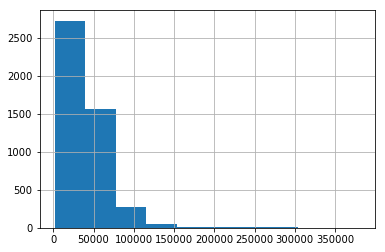

In [14]:
# Let's take a look at the distribution of car sales prices
cars.clean_price.hist()
plt.show()

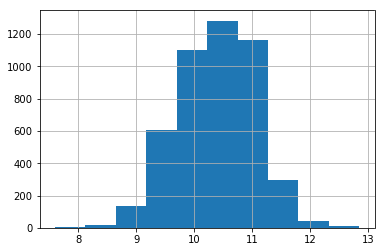

In [18]:
# Seems to follow a lognormal distribution, so let's take the log of carsales price
cars['log_saleprice'] = np.log(cars['clean_price'])
cars.log_saleprice.hist()
plt.show()
# This looks like a normal distribution so we can decompose the log sales price into the sum of composite factors

# Factors that impact Car Sales

Let's begin with a basic model that only uses quantitative and categorical features:

- Number of Doors
- Number of Seats
- Engine Size
- Number of Cylinders
- Age of the car
- Mileage
- Vehicle Type
- Manufacturer

To predict the Log Sale Price (Y) of the car.

In [66]:
# Convert to dummy regressors.
car_dummies = pd.get_dummies(cars[['Manufacturer','vehicle_type']])
cars2 = pd.concat([cars, car_dummies], axis=1)

In [67]:
# Let's run a regression on the entire dataset to check how well a generic OLS model performs.
y = cars2[['log_saleprice']]
# Features
X = cars2.iloc[:,12:37]
X.drop(['clean_price','log_saleprice','vehicle_type','Year'], axis=1, inplace=True)
# Add an intercept term
X = sm.add_constant(X)
res = sm.OLS(y, X, missing='drop').fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          log_saleprice   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     671.5
Date:                Thu, 21 Sep 2017   Prob (F-statistic):               0.00
Time:                        14:52:58   Log-Likelihood:                -893.45
No. Observations:                3555   AIC:                             1829.
Df Residuals:                    3534   BIC:                             1959.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

*We appear to have multicollinearity in our results, but even so this linear model does quite well. Most of our features appear to be statistically significant*

### Cross-Validation

In [102]:
# Run 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, HuberRegressor, RANSACRegressor, TheilSenRegressor

car_dummies = pd.get_dummies(cars[['Manufacturer','vehicle_type']])
cars2 = pd.concat([cars, car_dummies], axis=1)
# Drop all NaNs
cars2 = cars2.dropna(axis=0)
# Target
y = cars2[['log_saleprice']]
# Features
X = cars2.iloc[:,12:37]
X.drop(['clean_price','log_saleprice','vehicle_type','Year'], axis=1, inplace=True)
# Models
ols = LinearRegression()
huber = HuberRegressor()
ransac = RANSACRegressor()
ts = TheilSenRegressor()

In [104]:
cross_val_score(ransac, X, y, cv=5, scoring='r2').mean()

-40.262410885221612

In [105]:
cross_val_score(huber, X, y, cv=5, scoring='r2').mean()

-20.660673908557445

In [106]:
cross_val_score(ts, X, y, cv=5, scoring='r2').mean()

-36.563581266151331

In [107]:
cross_val_score(ols, X, y, cv=5, scoring='r2').mean()

0.71685925221577296

In [108]:
cars_nlp.shape

(3404, 22)

*Cross-Validating confirms that the best score comes from an OLS model. Can we improve upon this using NLP on the car description provided by the dealer to extract more explanatory features?*

---

To answer this question we will regress the residuals from the first model on descriptive features from the car_description column.

## Fitting residuals of OLS model to NLP extract of description column
---

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_train = train_test_split(X,y)

In [110]:
ols.fit(X, y)
# Calculate residuals
ypred_ols = ols.predict(X)
y_actual = y
residuals = y_actual - ypred_ols
residuals.rename(columns={'log_saleprice':'Residuals'}, inplace=True)
residuals.tail()

,Residuals
4644,0.383386
4653,0.178830
4659,-0.505125
4660,-0.224984
4664,0.001681


In [161]:
# Let's look at single words, bi-grams, tri-grams and use max_features to look at the top 1000 words by frequency
from sklearn.feature_extraction.text import TfidfVectorizer
cars_nlp = cars2.copy()
stopword_list = ['and','to','the','of','at','the','is']
tfidf = TfidfVectorizer(stop_words=stopword_list, ngram_range=(1,3), max_features=1000)
car_vec = tfidf.fit_transform(cars_nlp.description)
car_vec

<3404x1000 sparse matrix of type '<type 'numpy.float64'>'
	with 299649 stored elements in Compressed Sparse Row format>

In [162]:
tfidf.get_feature_names()

[u'000',
 u'000km',
 u'000km mechanical',
 u'000km mechanical protection',
 u'10',
 u'10 minutes',
 u'10 minutes from',
 u'100',
 u'100 point',
 u'100 point safety',
 u'115',
 u'115 point',
 u'12',
 u'12 months',
 u'150',
 u'17',
 u'175',
 u'175 000km',
 u'175 000km mechanical',
 u'18',
 u'19',
 u'20',
 u'200',
 u'200 vehicles',
 u'2012',
 u'2013',
 u'2014',
 u'2015',
 u'2016',
 u'2017',
 u'24',
 u'25',
 u'30',
 u'4x4',
 u'50',
 u'50 years',
 u'able',
 u'about',
 u'about our',
 u'abs',
 u'access',
 u'act',
 u'addition',
 u'additional',
 u'advantage',
 u'after',
 u'air',
 u'air conditioning',
 u'airbags',
 u'airport',
 u'all',
 u'all our',
 u'all our vehicles',
 u'all trade',
 u'all trade ins',
 u'all vehicles',
 u'all your',
 u'alloy',
 u'alloy wheels',
 u'alloys',
 u'also',
 u'also comes',
 u'also offer',
 u'also offers',
 u'always',
 u'amazing',
 u'an',
 u'an appointment',
 u'answer',
 u'any',
 u'anywhere',
 u'anywhere in',
 u'anywhere in australia',
 u'applicable',
 u'apply',
 u'app

In [211]:
car_vec.toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.08003465,  0.08323026],
       [ 0.05041066,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06975982,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

***A Lasso regression would really help us narrowing our scope down...***

## GridSearch with Lasso Regression to identify interesting descriptive features
---

In [198]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": np.linspace(.00001, 0.0001, 40)}
lasso = Lasso()
l_gscv = GridSearchCV(lasso, param_grid=param_grid, verbose=1, cv=5)

In [199]:
X_new = car_vec.toarray()
target_new = residuals

In [200]:
l_gscv.fit(X_new, target_new)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.8min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-05,   1.23077e-05,   1.46154e-05,   1.69231e-05,
         1.92308e-05,   2.15385e-05,   2.38462e-05,   2.61538e-05,
         2.84615e-05,   3.07692e-05,   3.30769e-05,   3.53846e-05,
         3.76923e-05,   4.00000e-05,   4.23077e-05,   4.46154e-05,
         4....,   8.84615e-05,   9.07692e-05,
         9.30769e-05,   9.53846e-05,   9.76923e-05,   1.00000e-04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [201]:
l_gscv.best_params_

{'alpha': 0.0001}

In [202]:
l_gscv.score(X_new, target_new)

0.26136494744703131

### Seems like we can explain 26% of the residuals from our first model using text from the description column
---
Which words have the highest explanatory value from our regression?

In [215]:
lgscv_cardesc_df = pd.DataFrame({
    'Feature': tfidf.get_feature_names(),
    'Coefficient': l_gscv.best_estimator_.coef_
},columns=['Feature', 'Coefficient'])
lgscv_cardesc_df.sort_values('Coefficient', ascending=False, inplace=True)
lgscv_cardesc_df.head(10)

,Feature,Coefficient
748,see,0.912838
802,surround,0.902404
137,bar,0.704956
738,same day,0.685085
721,retail,0.551536
683,professional,0.538874
867,up,0.517789
917,we can,0.505415
338,finance insurance,0.494579
33,4x4,0.484587


# Junk Code...please ignore
---
Ignore everything below

In [194]:
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import GridSearchCV
# param_grid = {"alpha": np.logspace(.00001, 0.0001, 40)}
# lasso = Lasso()
# l_gscv = GridSearchCV(lasso, param_grid=param_grid, verbose=1, cv=5)

# X_new = car_vec.toarray()
# target_new = residuals

In [195]:
# l_gscv.fit(X_new, target_new)

In [90]:
#p = vehicle('https://www.carsales.com.au/dealer/details/Toyota-Camry-2014/OAG-AD-14552579')

In [91]:
#p.cartitle()

In [92]:
#p.carprice()

In [93]:
#p.carcolor()

In [94]:
#p.km()

In [95]:
#p.sellerdesc()

In [96]:
#url = 'https://www.carsales.com.au/car/dealer/bncis/demo/toyota/new-south-wales-state/'

In [97]:
#url = 'https://www.carsales.com.au/car/dealer/bncis/demo/toyota/new-south-wales-state/'
#r = requests.get(url)
#soup = BeautifulSoup(r.text, 'lxml')
#link = soup.find('a', class_='click-area')

In [98]:
#print 'https://www.carsales.com.au'+str(link['href'])

In [99]:
#fail = soup.find(class_='next tippable').find('a')['href']
#print fail
#else:
    #nextlink = soup.find(class_='next tippable').find('a')['href']

In [100]:
#url = 'https://www.carsales.com.au/dealer/details/Toyota-Camry-2016/OAG-AD-15110490'
#car = requests.get(url)
#car.status_code

In [101]:
#soup = BeautifulSoup(car.text, 'lxml')
#carinfo = soup.find(id="vehicle-details")

In [102]:
#soup = BeautifulSoup(car.text, 'lxml')
#carinfo.find_all('td')[5].string.strip()

In [103]:
#soup.find('div', class_="view-more-target").text

In [104]:
#list(carinfo.parent)

In [105]:
#carinfo.string

In [106]:
#import numpy as np
#page_number = np.arange(0,120,12)